# Project Name: Stock Return Prediction and Portfolio Optimization #


Master in Management and Digital Technology, TUM School of Management

Submitted to: Professor. Dr. Jingui Xie
Date of Submission: August 15th, 2024

Group Members:
1. Yen Vu Thi Ngoc (Matriculation No.: 03797033)
2. Rui Liu (Matriculation No.: 03796764)
3. Yesenia Marin Paniagua (Matriculation No.: 03796704)

# Table of Contents:
1. Introduction
2. Data Processing
3. Descriptive Analysis
4. Predictive Analysis
5. Prescriptive Analysis (Rolling Windows and Optimisation)
6. Performance Assessment
8. Conclusions

# 1. Introduction

This project focuses on optimizing stock portfolios of 10 US companies in various industries using various financial theories and machine learning models. The data is collected from WRDS database including Stock Daily Trading dataset and Financial Ratios dataset from 01-01-2022 to 31-12-2023. It includes sections for data pre-processing, processing, machine learning model development, evaluation and selection for later prediction, rolling windows and optimisation strategies for choosing and adjusting portfolio optimal weights. 

This project in important in real world´s situation for manager or investors in making sotck trading decisions in short-term period and later develop long-term strategies using stock market data. The aim is to develop methodology to calculate and predict optimal stock portfolio with maximum Sharpe Ratio.

# 2. Data Processing
In this section, data is pre-processed and cleaned before using for the analysis, including:
1. Import Required Libraries: Start by importing all the necessary libraries for data manipulation and analysis
2. Load Datasets: Load the datasets into Pandas DataFrames
3. Rename Columns and Remove Unnecessary Variables: Rename the columns to make them more meaningful or consistent, and remove any variables that are not needed
4. Convert Data Types: Convert the 'date' column to a datetime format, and ensure all other columns are in the appropriate data types
5. Handle Missing Data: Address any missing data in the datasets by either filling in or removing the missing values

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [91]:
# Importing stock daily trading of portfolio from 2022-01-01 until 2023-12-31
daily_trading = pd.read_csv("Stock_Daily_Trading.csv", sep= ",")
daily_trading

,PERMNO,date,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,NUMTRD,RETX,sprtrn
0,10107,2022-01-03,3,MSFT,MICROSOFT CORP,8048,NaN,329.78000,338.00000,334.75000,28823566,-0.004668,7507980,335.35001,397115.0,-0.004668,0.006374
1,10107,2022-01-04,3,MSFT,MICROSOFT CORP,8048,NaN,326.12000,335.20001,329.01001,32626156,-0.017147,7507980,334.82999,520038.0,-0.017147,-0.000630
2,10107,2022-01-05,3,MSFT,MICROSOFT CORP,8048,NaN,315.98001,326.07001,316.38000,39957778,-0.038388,7507980,325.85999,641921.0,-0.038388,-0.019393
3,10107,2022-01-06,3,MSFT,MICROSOFT CORP,8048,NaN,311.48999,318.70001,313.88000,39744069,-0.007902,7507980,313.14999,630065.0,-0.007902,-0.000964
4,10107,2022-01-07,3,MSFT,MICROSOFT CORP,8048,NaN,310.09000,316.50000,314.04001,32664078,0.000510,7507980,314.14999,501305.0,0.000510,-0.004050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,ALPHABET INC,45483,NaN,140.71001,141.99001,141.49001,26396854,0.007620,5918000,140.77000,295666.0,0.007620,0.001660
5006,90319,2023-12-26,3,GOOGL,ALPHABET INC,45483,NaN,141.19000,142.67999,141.52000,16684304,0.000212,5918000,141.59000,208470.0,0.000212,0.004232
5007,90319,2023-12-27,3,GOOGL,ALPHABET INC,45483,NaN,139.88600,142.08000,140.37000,19440225,-0.008126,5918000,141.59000,233363.0,-0.008126,0.001430
5008,90319,2023-12-28,3,GOOGL,ALPHABET INC,45483,NaN,139.75000,141.14000,140.23000,16023523,-0.000997,5918000,140.78000,199651.0,-0.000997,0.000370


In [92]:
daily_trading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   5010 non-null   int64  
 1   date     5010 non-null   object 
 2   EXCHCD   5010 non-null   int64  
 3   TICKER   5010 non-null   object 
 4   COMNAM   5010 non-null   object 
 5   PERMCO   5010 non-null   int64  
 6   DIVAMT   65 non-null     float64
 7   BIDLO    5010 non-null   float64
 8   ASKHI    5010 non-null   float64
 9   PRC      5010 non-null   float64
 10  VOL      5010 non-null   int64  
 11  RET      5010 non-null   float64
 12  SHROUT   5010 non-null   int64  
 13  OPENPRC  5010 non-null   float64
 14  NUMTRD   2004 non-null   float64
 15  RETX     5010 non-null   float64
 16  sprtrn   5010 non-null   float64
dtypes: float64(9), int64(5), object(3)
memory usage: 665.5+ KB


In [93]:
daily_trading.shape

(5010, 17)

In [94]:
# Importing financial ratios of 10 companies in the portfolio from 2022-01-01 until 2023-12-31
financial_ratios = pd.read_csv("Financial Ratios_Top 10 Profitable Companies_2y.csv", sep= ",")
financial_ratios

,gvkey,permno,adate,qdate,public_date,pe_exi,pe_inc,dpr,npm,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,TICKER
0,12141,10107,2021-06-30,2021-09-30,2022-01-31,34.785,34.785,0.249,0.385,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550,MSFT
1,12141,10107,2021-06-30,2021-12-31,2022-02-28,31.820,31.820,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
2,12141,10107,2021-06-30,2021-12-31,2022-03-31,32.834,32.834,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
3,12141,10107,2021-06-30,2021-12-31,2022-04-30,29.555,29.555,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
4,12141,10107,2021-06-30,2022-03-31,2022-05-31,28.379,28.379,0.245,0.376,0.759,0.291,0.492,0.236,0.469,38.947,2.081,2.119,15.010,0.569,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160329,90319,2022-12-31,2023-06-30,2023-08-31,28.850,28.850,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
236,160329,90319,2022-12-31,2023-06-30,2023-09-30,27.725,27.725,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
237,160329,90319,2022-12-31,2023-06-30,2023-10-31,26.288,26.288,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
238,160329,90319,2022-12-31,2023-09-30,2023-11-30,25.438,25.438,0.000,0.225,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785,GOOGL


In [95]:
financial_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gvkey         240 non-null    int64  
 1   permno        240 non-null    int64  
 2   adate         240 non-null    object 
 3   qdate         240 non-null    object 
 4   public_date   240 non-null    object 
 5   pe_exi        240 non-null    float64
 6   pe_inc        240 non-null    float64
 7   dpr           239 non-null    float64
 8   npm           240 non-null    float64
 9   gpm           240 non-null    float64
 10  roa           240 non-null    float64
 11  roe           240 non-null    float64
 12  debt_at       240 non-null    float64
 13  dltt_be       240 non-null    float64
 14  intcov_ratio  191 non-null    float64
 15  quick_ratio   192 non-null    float64
 16  curr_ratio    192 non-null    float64
 17  inv_turn      216 non-null    float64
 18  at_turn       240 non-null    

In [96]:
financial_ratios.shape

(240, 20)

In [97]:
# Sort both datasets by "date" then "company name"
daily_trading["column_to_merge"] = daily_trading['PERMNO'].astype(str) + '_' + daily_trading['date'].astype(str)
financial_ratios["column_to_merge"] = financial_ratios['permno'].astype(str) + '_' + financial_ratios['public_date'].astype(str)

daily_trading = daily_trading.sort_values([ "column_to_merge"])
financial_ratios = financial_ratios.sort_values([ "column_to_merge"])

financial_ratios

,gvkey,permno,adate,qdate,public_date,pe_exi,pe_inc,dpr,npm,gpm,...,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,TICKER,column_to_merge
0,12141,10107,2021-06-30,2021-09-30,2022-01-31,34.785,34.785,0.249,0.385,0.758,...,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550,MSFT,10107_2022-01-31
1,12141,10107,2021-06-30,2021-12-31,2022-02-28,31.820,31.820,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-02-28
2,12141,10107,2021-06-30,2021-12-31,2022-03-31,32.834,32.834,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-03-31
3,12141,10107,2021-06-30,2021-12-31,2022-04-30,29.555,29.555,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-04-30
4,12141,10107,2021-06-30,2022-03-31,2022-05-31,28.379,28.379,0.245,0.376,0.759,...,0.492,0.236,0.469,38.947,2.081,2.119,15.010,0.569,MSFT,10107_2022-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160329,90319,2022-12-31,2023-06-30,2023-08-31,28.850,28.850,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-08-31
236,160329,90319,2022-12-31,2023-06-30,2023-09-30,27.725,27.725,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-09-30
237,160329,90319,2022-12-31,2023-06-30,2023-10-31,26.288,26.288,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-10-31
238,160329,90319,2022-12-31,2023-09-30,2023-11-30,25.438,25.438,0.000,0.225,0.604,...,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785,GOOGL,90319_2023-11-30


In [98]:
# Merge the two DataFrames using an outer join on "column to merge" column
merged_stock_df = pd.merge(daily_trading, financial_ratios, on='column_to_merge', how='outer')
merged_stock_df = merged_stock_df.sort_values([ "column_to_merge"])
merged_stock_df[["column_to_merge", "quick_ratio"]]


,column_to_merge,quick_ratio
0,10107_2022-01-03,NaN
1,10107_2022-01-04,NaN
2,10107_2022-01-05,NaN
3,10107_2022-01-06,NaN
4,10107_2022-01-07,NaN
...,...,...
5006,90319_2023-12-26,NaN
5007,90319_2023-12-27,NaN
5008,90319_2023-12-28,NaN
5009,90319_2023-12-29,NaN


In [99]:
# Handling missing values in the merged DataFrame
missing_values = merged_stock_df.isnull().sum()
print(missing_values)

PERMNO               60
date                 60
EXCHCD               60
TICKER_x             60
COMNAM               60
PERMCO               60
DIVAMT             5005
BIDLO                60
ASKHI                60
PRC                  60
VOL                  60
RET                  60
SHROUT               60
OPENPRC              60
NUMTRD             3066
RETX                 60
sprtrn               60
column_to_merge       0
gvkey              4830
permno             4830
adate              4830
qdate              4830
public_date        4830
pe_exi             4830
pe_inc             4830
dpr                4831
npm                4830
gpm                4830
roa                4830
roe                4830
debt_at            4830
dltt_be            4830
intcov_ratio       4879
quick_ratio        4878
curr_ratio         4878
inv_turn           4854
at_turn            4830
TICKER_y           4830
dtype: int64


In [100]:
# Fill missing values using backward fill
columns_to_fill = [
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn'
]

for column in columns_to_fill:
    merged_stock_df[column] = merged_stock_df[column].fillna(method='bfill')

#Fill financial_ratios manually with zero values for companies whose no records (META has no records in "inv_turn", JPM and BAC have no records in "intcov_ratio", "quick_ratio", "curr_ratio")
merged_stock_df.loc[merged_stock_df['PERMNO'] == 13407, 'inv_turn'] = 0
merged_stock_df.loc[(merged_stock_df['PERMNO'] == 47896) | (merged_stock_df['PERMNO'] == 59408), ['intcov_ratio', 'quick_ratio', 'curr_ratio']] = 0

# Drop rows with missing values in specified columns due to non-trading days
columns_to_drop_na = ['PERMNO', 'EXCHCD', 'TICKER_x', 'COMNAM', 'PERMCO', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'OPENPRC', 'RETX']
merged_stock_df.dropna(subset=columns_to_drop_na, inplace=True)

merged_stock_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5009
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERMNO           5010 non-null   float64
 1   date             5010 non-null   object 
 2   EXCHCD           5010 non-null   float64
 3   TICKER_x         5010 non-null   object 
 4   COMNAM           5010 non-null   object 
 5   PERMCO           5010 non-null   float64
 6   DIVAMT           65 non-null     float64
 7   BIDLO            5010 non-null   float64
 8   ASKHI            5010 non-null   float64
 9   PRC              5010 non-null   float64
 10  VOL              5010 non-null   float64
 11  RET              5010 non-null   float64
 12  SHROUT           5010 non-null   float64
 13  OPENPRC          5010 non-null   float64
 14  NUMTRD           2004 non-null   float64
 15  RETX             5010 non-null   float64
 16  sprtrn           5010 non-null   float64
 17  column_to_merge  50

In [101]:
# Fill missing values in 'DIVAMT' and 'NUMTRD' columns with 0
merged_stock_df['DIVAMT'].fillna(0, inplace=True)
merged_stock_df['NUMTRD'].fillna(0, inplace=True)

#Drop unnessary columns: gvkey, permno, adate, qdate, TICKER_y
merged_stock_df = merged_stock_df.drop(['gvkey', 'permno', 'PERMCO','COMNAM', 'adate', 'qdate', 'public_date','TICKER_y', 'column_to_merge'], axis=1)

# Verify if missing values are dropped
print(merged_stock_df.isnull().sum())

PERMNO          0
date            0
EXCHCD          0
TICKER_x        0
DIVAMT          0
BIDLO           0
ASKHI           0
PRC             0
VOL             0
RET             0
SHROUT          0
OPENPRC         0
NUMTRD          0
RETX            0
sprtrn          0
pe_exi          0
pe_inc          0
dpr             0
npm             0
gpm             0
roa             0
roe             0
debt_at         0
dltt_be         0
intcov_ratio    0
quick_ratio     0
curr_ratio      0
inv_turn        0
at_turn         0
dtype: int64


In [102]:
# Check data types of all columns
print(merged_stock_df.dtypes)

#Convert into correct datatypes:
merged_stock_df['PERMNO'] = merged_stock_df['PERMNO'].astype(str)
merged_stock_df['EXCHCD'] = merged_stock_df['EXCHCD'].astype(str)
merged_stock_df['date'] = pd.to_datetime(merged_stock_df['date'])

#Check duplicates
duplicates = merged_stock_df.duplicated()
print(duplicates.sum())


PERMNO          float64
date             object
EXCHCD          float64
TICKER_x         object
DIVAMT          float64
BIDLO           float64
ASKHI           float64
PRC             float64
VOL             float64
RET             float64
SHROUT          float64
OPENPRC         float64
NUMTRD          float64
RETX            float64
sprtrn          float64
pe_exi          float64
pe_inc          float64
dpr             float64
npm             float64
gpm             float64
roa             float64
roe             float64
debt_at         float64
dltt_be         float64
intcov_ratio    float64
quick_ratio     float64
curr_ratio      float64
inv_turn        float64
at_turn         float64
dtype: object
0


In [103]:
merged_stock_df.shape

(5010, 29)

In [104]:
merged_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5009
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PERMNO        5010 non-null   object        
 1   date          5010 non-null   datetime64[ns]
 2   EXCHCD        5010 non-null   object        
 3   TICKER_x      5010 non-null   object        
 4   DIVAMT        5010 non-null   float64       
 5   BIDLO         5010 non-null   float64       
 6   ASKHI         5010 non-null   float64       
 7   PRC           5010 non-null   float64       
 8   VOL           5010 non-null   float64       
 9   RET           5010 non-null   float64       
 10  SHROUT        5010 non-null   float64       
 11  OPENPRC       5010 non-null   float64       
 12  NUMTRD        5010 non-null   float64       
 13  RETX          5010 non-null   float64       
 14  sprtrn        5010 non-null   float64       
 15  pe_exi        5010 non-null   float64      

# 3. Descriptive Analysis

In [105]:
df = merged_stock_df.copy()
#df_numeric = df.select_dtypes(include=['number'])

In [106]:
print(df.describe())

                                date       DIVAMT        BIDLO        ASKHI  \
count                           5010  5010.000000  5010.000000  5010.000000   
mean   2022-12-31 15:37:00.359281408     0.008863   192.110799   197.128276   
min              2022-01-03 00:00:00     0.000000    24.960000    25.650000   
25%              2022-07-05 00:00:00     0.000000    49.096250    50.238750   
50%              2022-12-30 00:00:00     0.000000   127.905000   130.939995   
75%              2023-07-03 00:00:00     0.000000   169.967497   173.569997   
max              2023-12-29 00:00:00     1.510000  2910.450200  3030.931400   
std                              NaN     0.089935   390.284300   401.922197   

               PRC           VOL          RET        SHROUT      OPENPRC  \
count  5010.000000  5.010000e+03  5010.000000  5.010000e+03  5010.000000   
mean    194.606800  2.966068e+07     0.000243  5.688157e+06   194.634313   
min      25.170000  9.919130e+05    -0.263901  3.007370e+05 

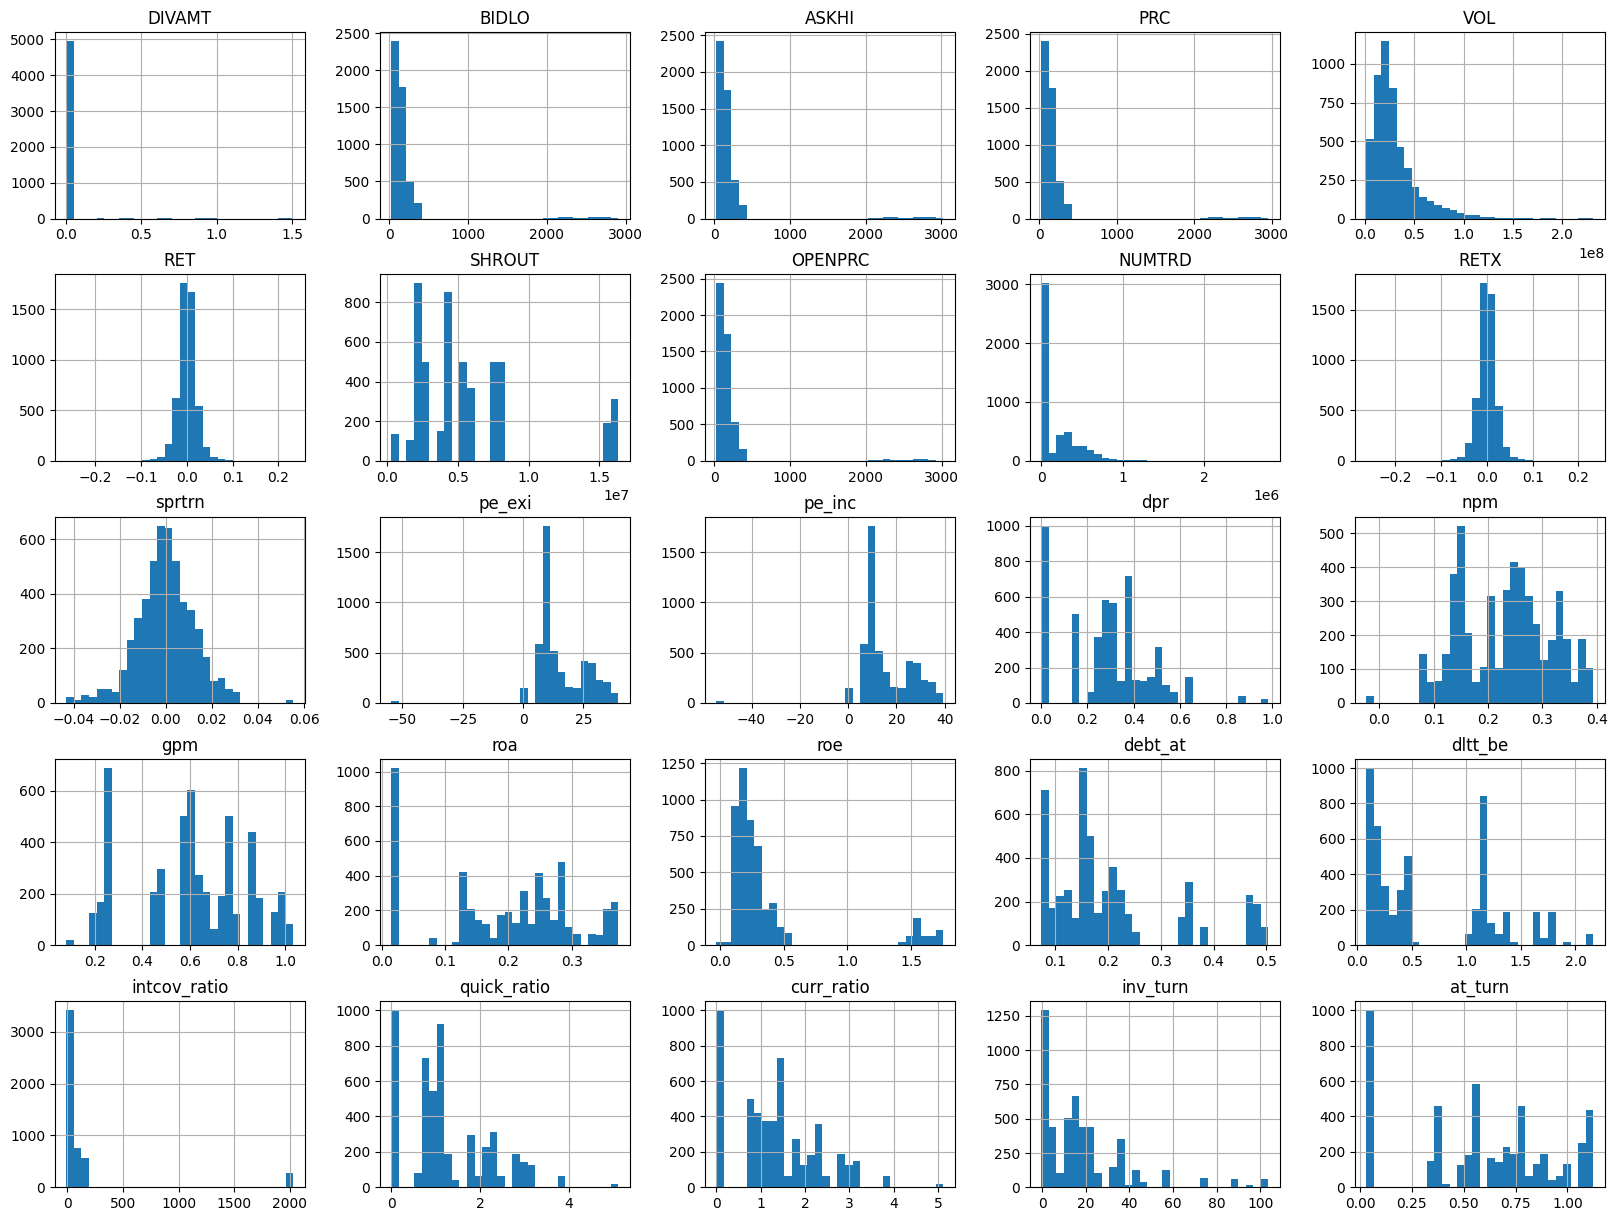

In [107]:
df_without_date = df.drop(columns=['date'])

#Histograms
df_without_date.hist(bins=30, figsize=(20, 15))
plt.show()

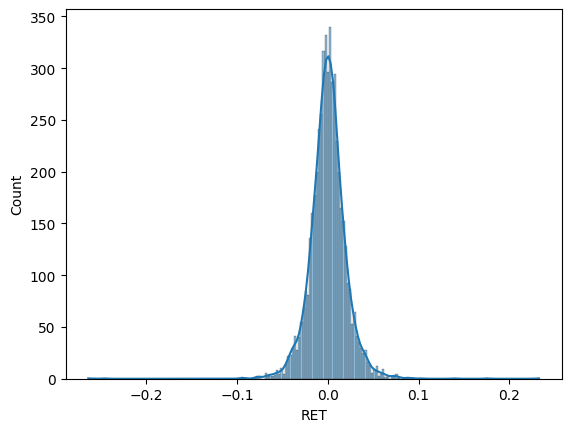

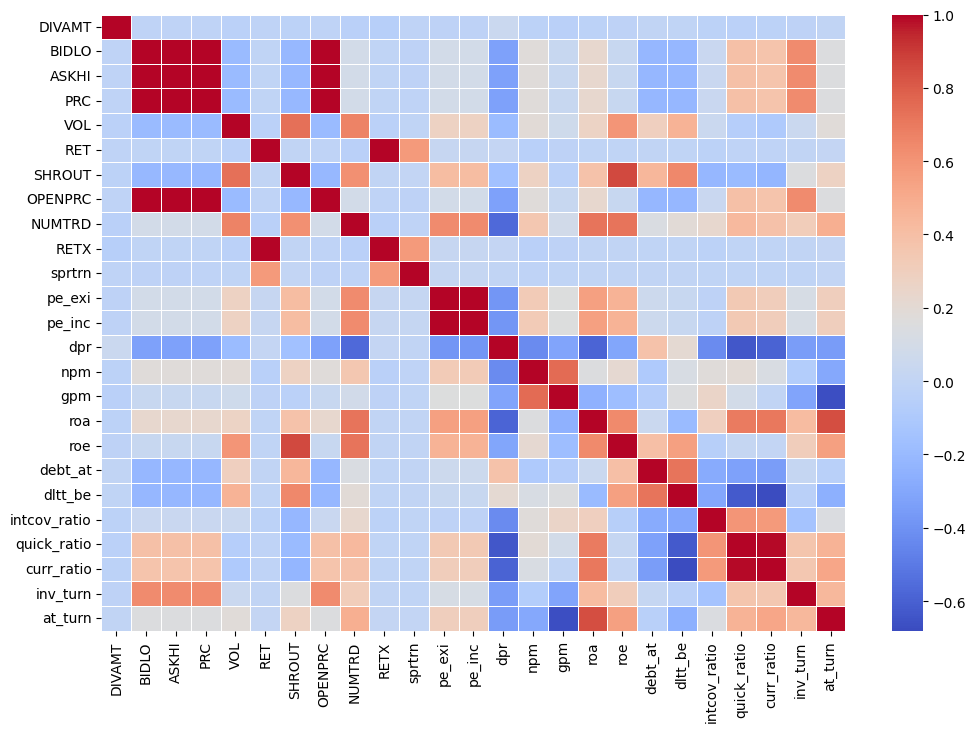

In [108]:
sns.histplot(df['RET'], kde=True)
plt.show()
numeric_df = df.select_dtypes(include=[float, int])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

         count      mean       std       min       25%       50%       75%  \
PERMNO                                                                       
10107.0  501.0  0.000446  0.019337 -0.077156 -0.010974  0.000405  0.012272   
11850.0  501.0  0.001310  0.019250 -0.078853 -0.010143  0.001629  0.012808   
13407.0  501.0  0.000691  0.033896 -0.263901 -0.013124  0.000648  0.015643   
14541.0  501.0  0.000788  0.017957 -0.067205 -0.008611  0.001121  0.010787   
14593.0  501.0  0.000351  0.018331 -0.058680 -0.009618  0.000628  0.010139   
21936.0  501.0 -0.001155  0.015784 -0.067180 -0.011179 -0.001203  0.008086   
47896.0  501.0  0.000395  0.016207 -0.061463 -0.008527  0.001016  0.008954   
59408.0  501.0 -0.000274  0.018768 -0.063736 -0.011224 -0.001459  0.008974   
65875.0  501.0 -0.000288  0.014361 -0.074978 -0.007187  0.000261  0.007134   
90319.0  501.0  0.000168  0.021951 -0.095094 -0.012997 -0.000084  0.012629   

              max  
PERMNO             
10107.0  0.082268  
118

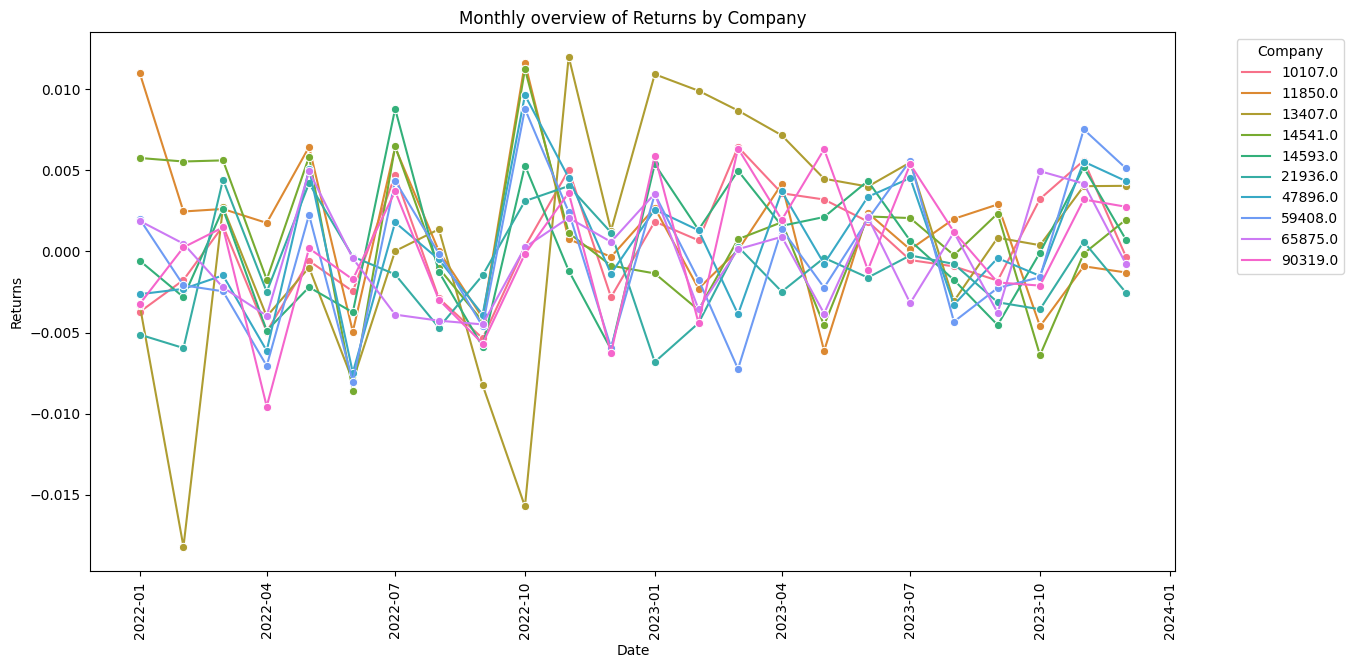

In [109]:
df['date'] = pd.to_datetime(df['date'])

df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

df['Month'] = df['date'].dt.to_period('M').dt.to_timestamp()
df_monthly = df.groupby(['Month', 'PERMNO'])['RET'].mean().reset_index()

summary_stats = df.groupby('PERMNO')['RET'].describe()
print(summary_stats)

plt.figure(figsize=(14, 7))
palette = sns.color_palette("husl", len(df['PERMNO'].unique()))

sns.lineplot(data=df_monthly, x='Month', y='RET', hue='PERMNO', palette=palette, marker='o')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Monthly overview of Returns by Company')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

          count      mean       std       min       25%       50%       75%  \
TICKER_x                                                                      
AAPL      501.0  0.000351  0.018331 -0.058680 -0.009618  0.000628  0.010139   
BAC       501.0 -0.000274  0.018768 -0.063736 -0.011224 -0.001459  0.008974   
CVX       501.0  0.000788  0.017957 -0.067205 -0.008611  0.001121  0.010787   
FB        109.0 -0.003959  0.042551 -0.263901 -0.023096 -0.002781  0.016601   
GOOGL     501.0  0.000168  0.021951 -0.095094 -0.012997 -0.000084  0.012629   
JPM       501.0  0.000395  0.016207 -0.061463 -0.008527  0.001016  0.008954   
META      392.0  0.001984  0.031007 -0.245571 -0.011837  0.001137  0.015375   
MSFT      501.0  0.000446  0.019337 -0.077156 -0.010974  0.000405  0.012272   
PFE       501.0 -0.001155  0.015784 -0.067180 -0.011179 -0.001203  0.008086   
VZ        501.0 -0.000288  0.014361 -0.074978 -0.007187  0.000261  0.007134   
XOM       501.0  0.001310  0.019250 -0.078853 -0.010

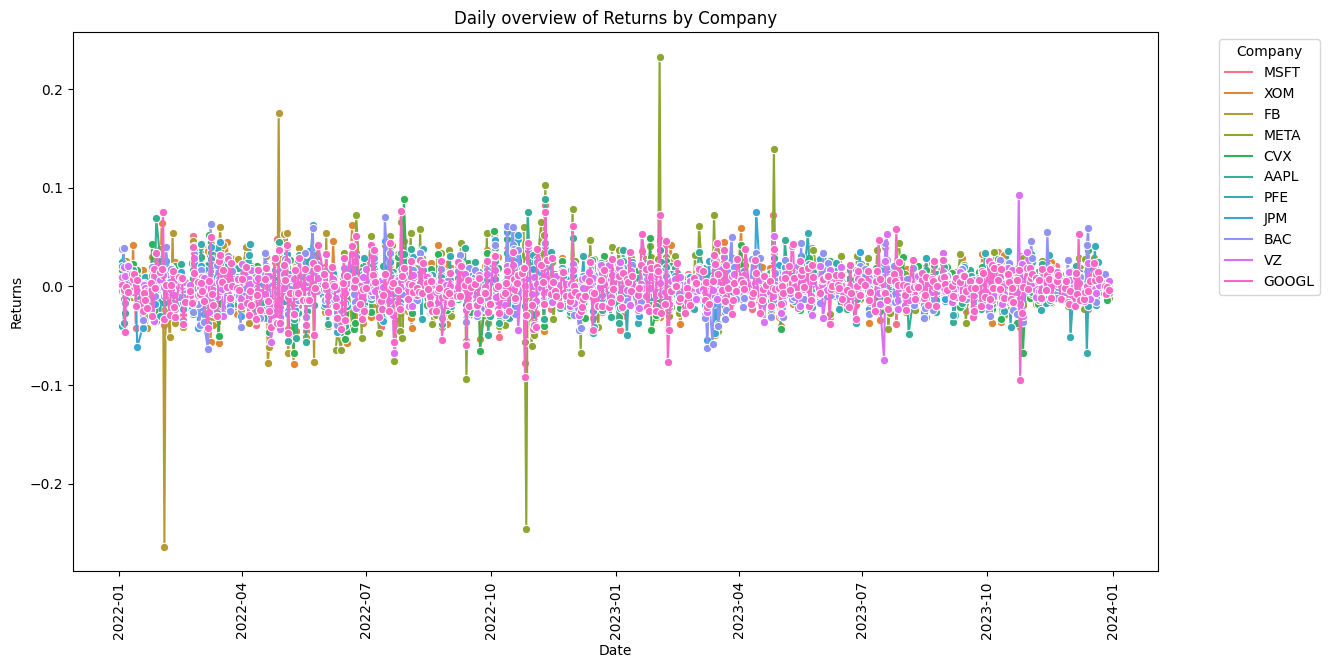

In [110]:
summary_stats = df.groupby('TICKER_x')['RET'].describe()
print(summary_stats)

plt.figure(figsize=(14, 7))
palette = sns.color_palette("husl", len(df['TICKER_x'].unique()))

sns.lineplot(data=df, x='date', y='RET', hue='TICKER_x', palette=palette, marker='o')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily overview of Returns by Company')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

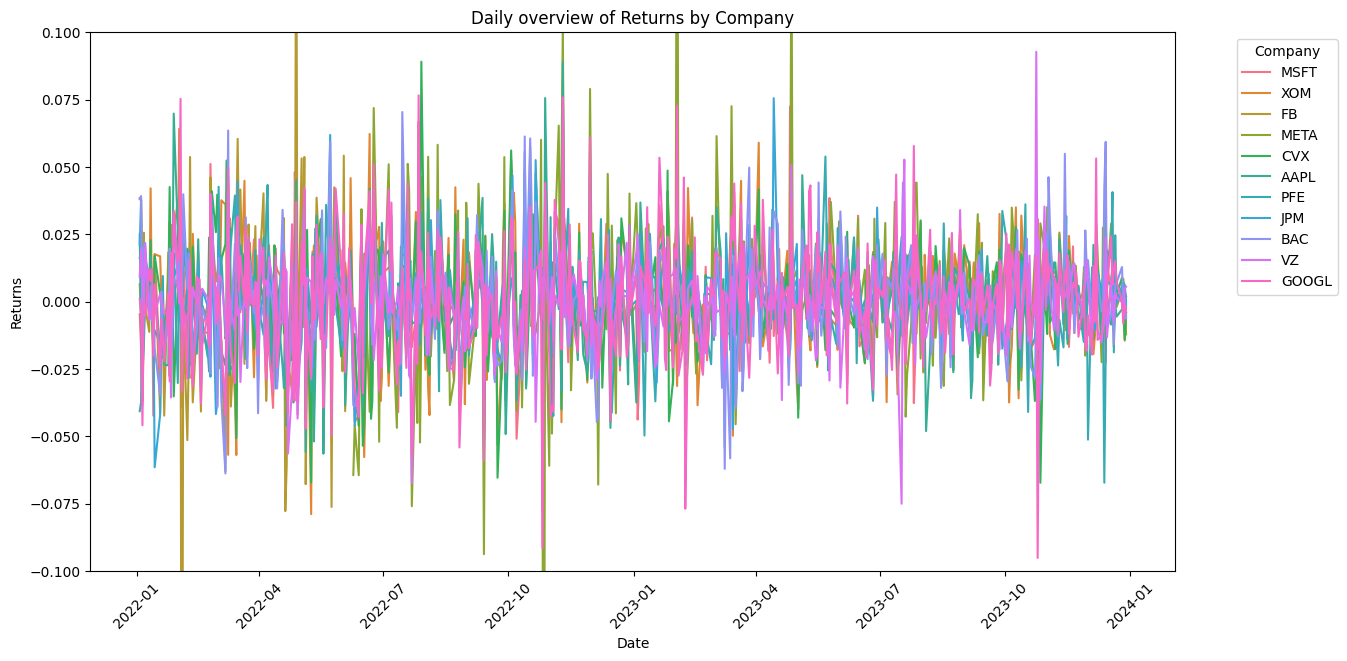

In [111]:
plt.figure(figsize=(14, 7))
palette = sns.color_palette("husl", len(df['TICKER_x'].unique()))

sns.lineplot(data=df, x='date', y='RET', hue='TICKER_x', palette=palette, marker='')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily overview of Returns by Company')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylim(-0.1, 0.1)
plt.show()

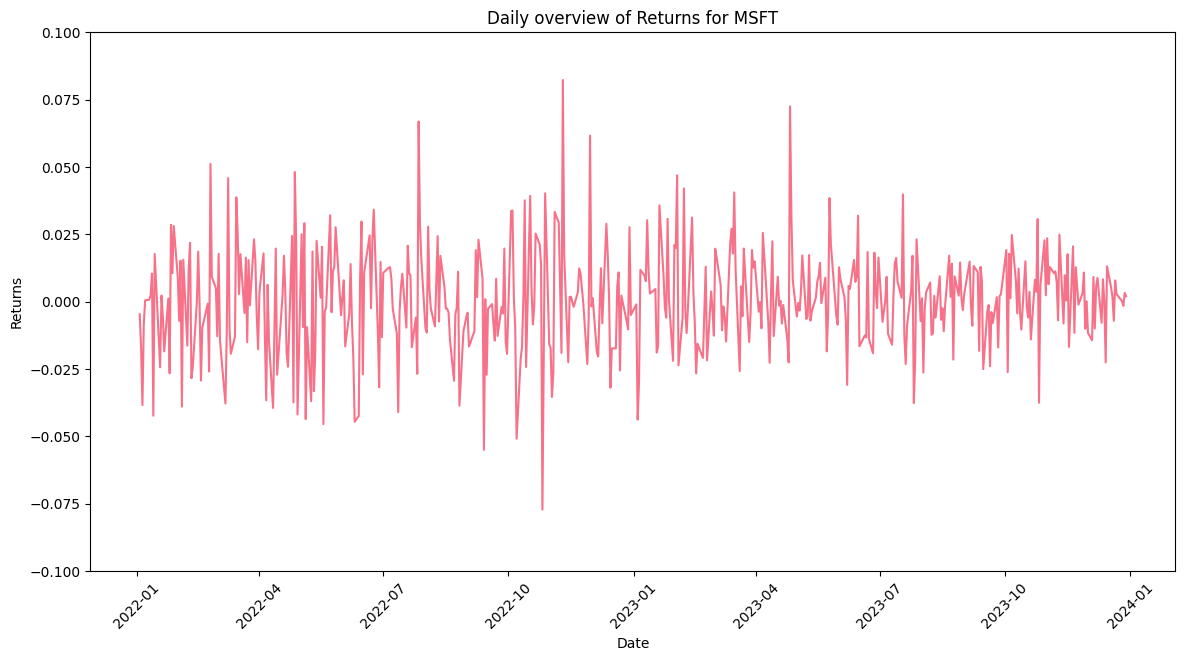

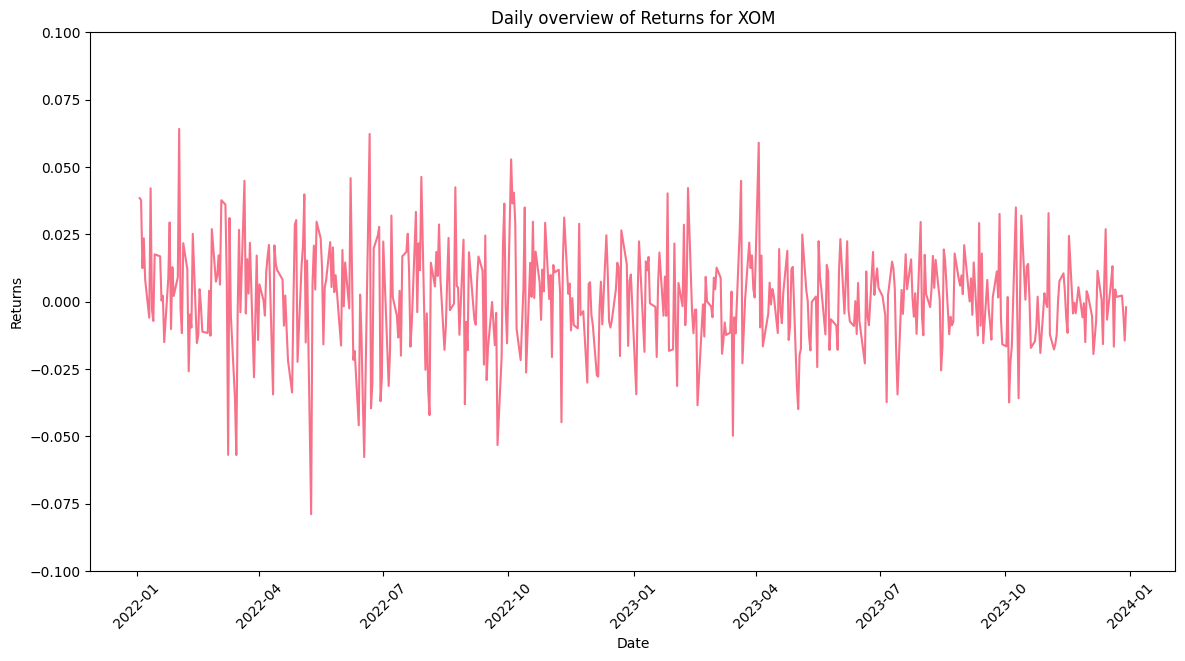

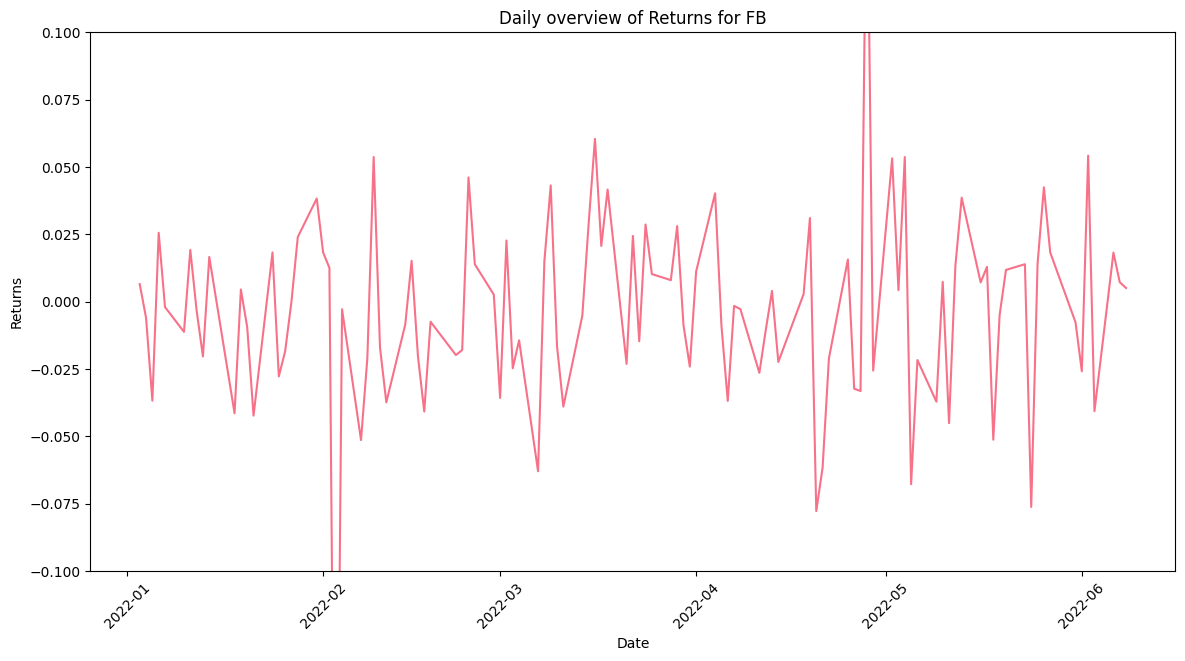

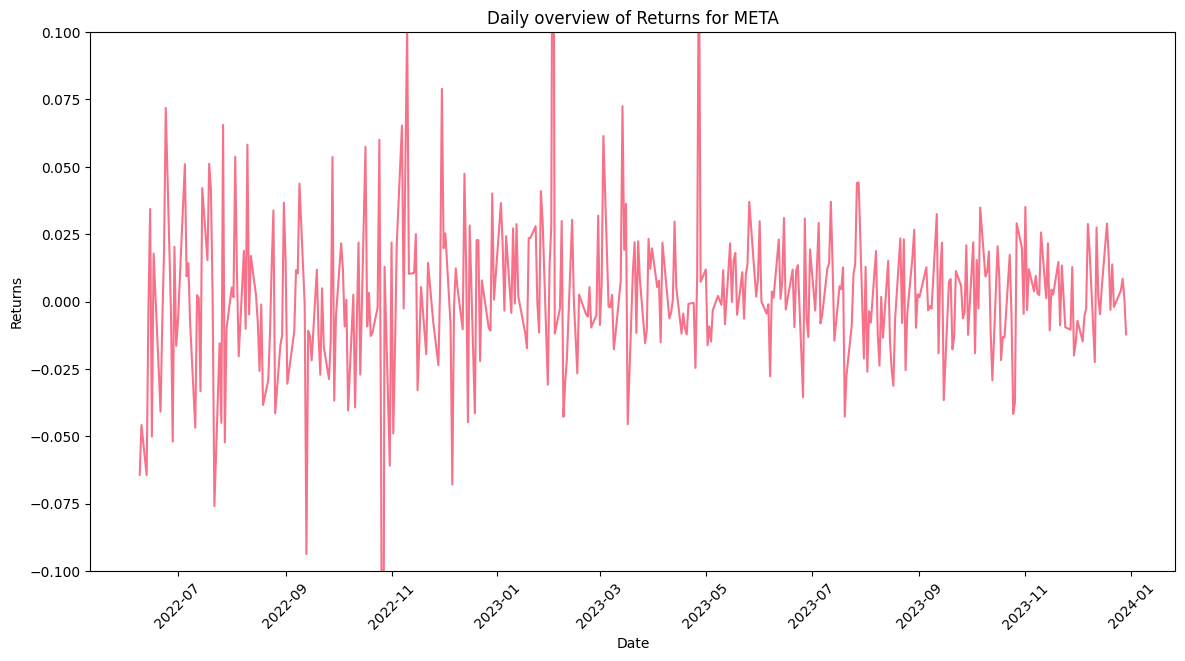

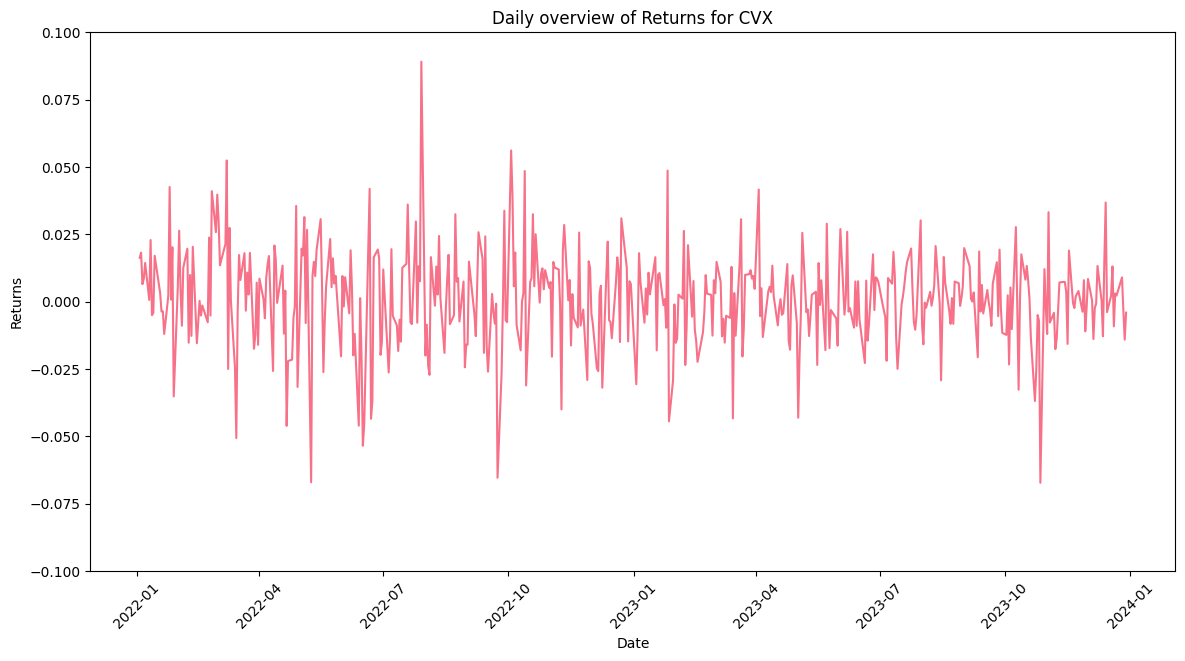

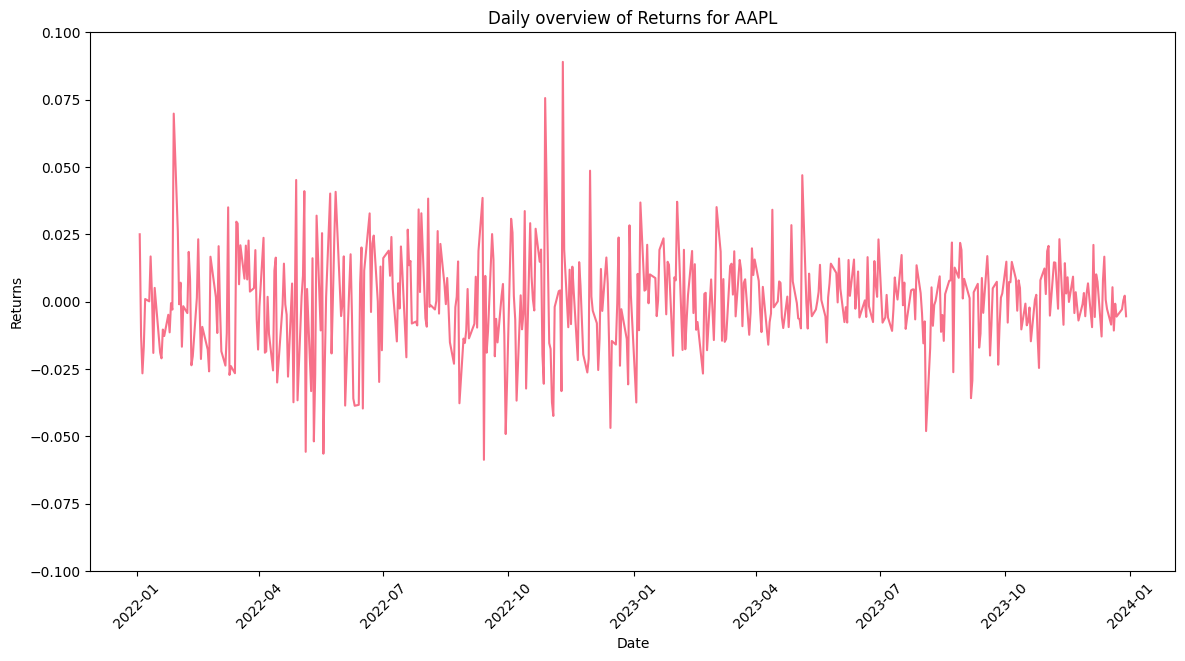

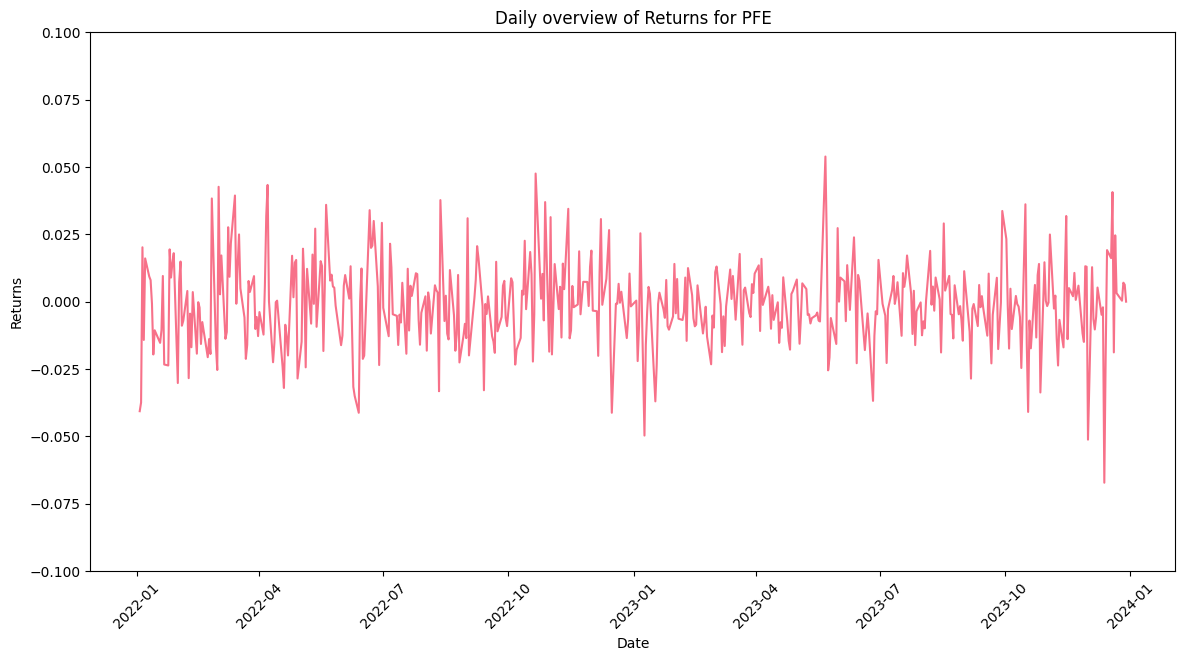

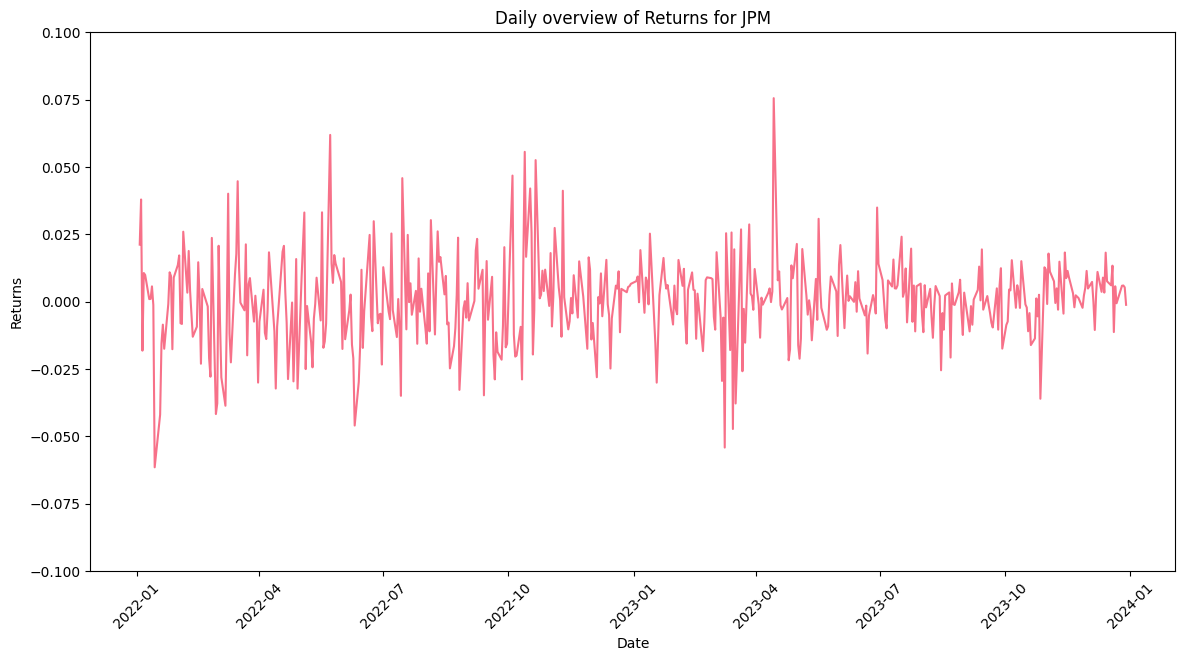

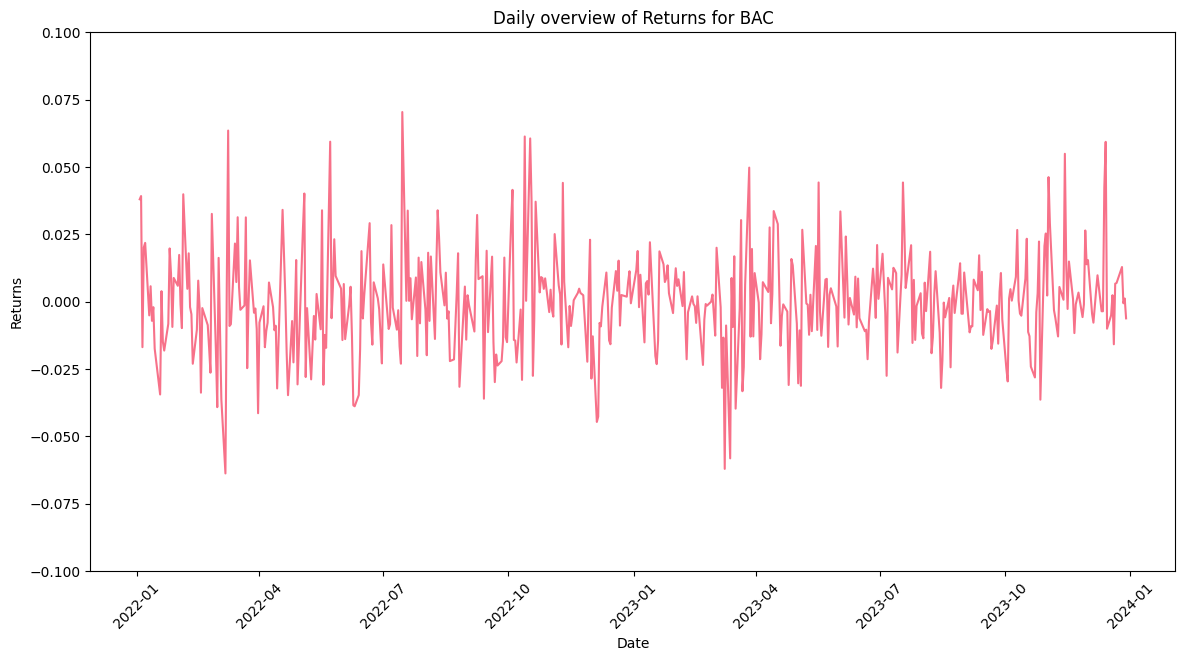

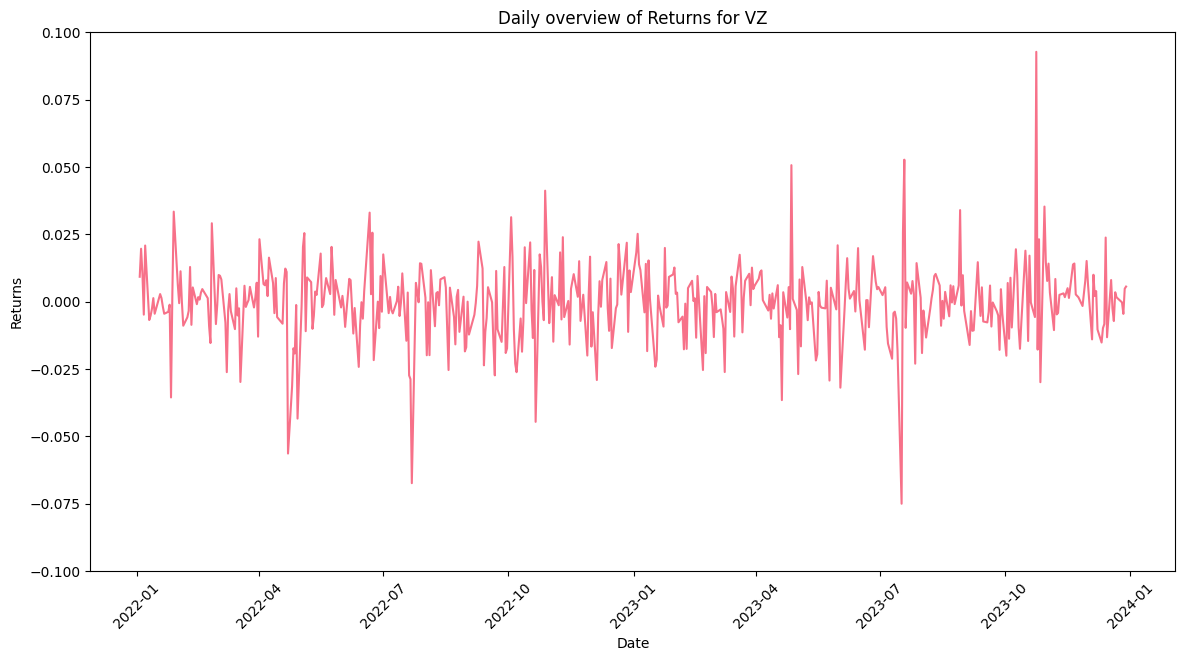

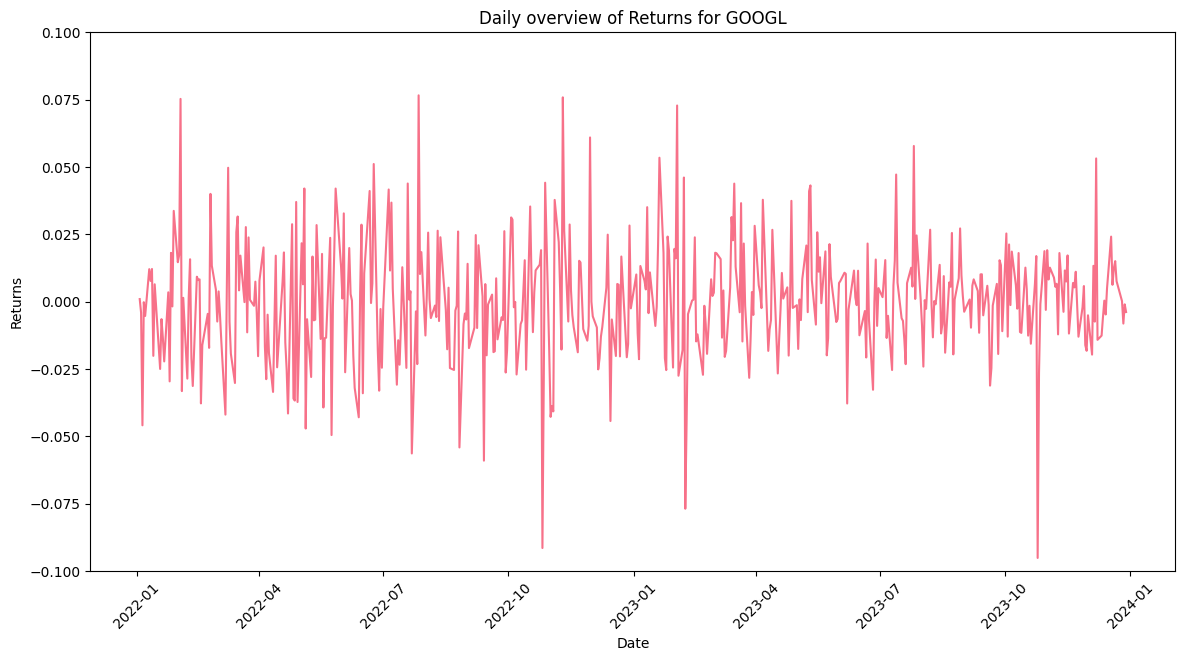

In [112]:
unique_tickers = df['TICKER_x'].unique()
palette = sns.color_palette("husl", len(unique_tickers))

for ticker in unique_tickers:
    plt.figure(figsize=(14, 7))
    company_data = df[df['TICKER_x'] == ticker]
    
    sns.lineplot(data=company_data, x='date', y='RET', color=palette[0], marker='')

    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.title(f'Daily overview of Returns for {ticker}')
    plt.ylim(-0.1, 0.1)  # Establecer los límites del eje Y
    plt.xticks(rotation=45)
    plt.show()

# 4. Predictive Analysis

## 4.1 Data Preparation

**Rui**

After merging two datasets and handling missing values, we still need to do some data preparation before applying predictive analysis.
This part includes:
1. Transform categorical variables (‘permno’, ‘exchange code’) with one-hot encoding;
2. Create lagged features (define lag_period = 21 days) and drop rows with NaN values due to lagging;
3. Standardize the data (target column 'RET' is standardized as well but separately for easy reverse standardization);
4. Sort the data first by ‘date’ then by ‘permno’, so that we can select data of year 2022 for model training and test;
5. Split the data of year 2022 into training, validation and testing set.

In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [114]:
# Make a copy of the merged data
stock = merged_stock_df.copy()
stock.head()

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn
0,10107.0,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
1,10107.0,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
2,10107.0,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
3,10107.0,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
4,10107.0,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55


In [115]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5009
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PERMNO        5010 non-null   object        
 1   date          5010 non-null   datetime64[ns]
 2   EXCHCD        5010 non-null   object        
 3   TICKER_x      5010 non-null   object        
 4   DIVAMT        5010 non-null   float64       
 5   BIDLO         5010 non-null   float64       
 6   ASKHI         5010 non-null   float64       
 7   PRC           5010 non-null   float64       
 8   VOL           5010 non-null   float64       
 9   RET           5010 non-null   float64       
 10  SHROUT        5010 non-null   float64       
 11  OPENPRC       5010 non-null   float64       
 12  NUMTRD        5010 non-null   float64       
 13  RETX          5010 non-null   float64       
 14  sprtrn        5010 non-null   float64       
 15  pe_exi        5010 non-null   float64      

In [116]:
# Transform categorical variables (permons)

# Ensure 'date' is datetime
stock['date'] = pd.to_datetime(stock['date'])

# Store original index order
original_index = stock.index

# Transform PERMNO
(permnos, idx) = np.unique(stock['PERMNO'], return_index=True)
permnos = [po for (i,po) in sorted(list(zip(idx,permnos)))]

encode = OneHotEncoder(categories=[permnos], drop = 'first')
permno_encoded = encode.fit_transform(np.array(stock['PERMNO']).reshape(-1,1)).toarray()

for i, po in enumerate(permnos[1:], start=1):  # Skipping the first permno due to 'drop=first'
    stock[po] = permno_encoded[:, i-1]

# Sort the data by original index to restore original order
stock = stock.loc[original_index]

stock

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,at_turn,11850.0,13407.0,14541.0,14593.0,21936.0,47896.0,59408.0,65875.0,90319.0
0,10107.0,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10107.0,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10107.0,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10107.0,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10107.0,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319.0,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5006,90319.0,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5007,90319.0,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5008,90319.0,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
# Transform categorical variables (Exchange Code)

# Convert EXCHCD to integer data type
# stock['EXCHCD'] = stock['EXCHCD'].astype(int)

(exchcds, idx) = np.unique(stock['EXCHCD'], return_index=True)
exchcds = sorted(exchcds)

encode = OneHotEncoder(categories=[exchcds], drop = 'first')
exchcd_encoded = encode.fit_transform(np.array(stock['EXCHCD']).reshape(-1,1)).toarray()

for i, cd in enumerate(exchcds[1:], start=1):  # Skipping the first exchcd due to 'drop=first'
    stock[cd] = exchcd_encoded[:, i-1]

# Sort the data by original index to restore original order
stock = stock.loc[original_index]

stock

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,11850.0,13407.0,14541.0,14593.0,21936.0,47896.0,59408.0,65875.0,90319.0,3.0
0,10107.0,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10107.0,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10107.0,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10107.0,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10107.0,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319.0,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5006,90319.0,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5007,90319.0,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5008,90319.0,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [118]:
# Create lagged features (lag 21 days)

# Make a copy of the encoded data
stock_lag1 = stock.copy()

In [119]:
# List variables that will have lagged features
vars = [ 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD',
         'RET', 'RETX', 'sprtrn',
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Define lag period
lag_period = 21

# Function to create lagged features for a single stock's data
def create_lagged_features(group, lag_period, vars):
    for var in vars:
        group[f'{var}_lag{lag_period}'] = group[var].shift(lag_period)
    return group

# Apply the lagged feature creation function to each stock's data
stock_lag1 = stock_lag1.groupby('PERMNO').apply(create_lagged_features, lag_period=lag_period, vars=vars)
stock_lag1 = stock_lag1.reset_index(drop=True)

stock_lag1

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
0,10107.0,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10107.0,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10107.0,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10107.0,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10107.0,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319.0,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5006,90319.0,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5007,90319.0,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5008,90319.0,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785


In [120]:
# Drop rows with NaN values due to lagging
stock_lag1.dropna(inplace=True)
stock_lag1

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107.0,2022-02-02,3.0,MSFT,0.0,308.88000,315.12000,313.45999,36566574.0,0.015222,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
22,10107.0,2022-02-03,3.0,MSFT,0.0,299.95999,311.23001,301.25000,43662713.0,-0.038952,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
23,10107.0,2022-02-04,3.0,MSFT,0.0,299.97000,308.79999,305.94000,35018097.0,0.015568,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
24,10107.0,2022-02-07,3.0,MSFT,0.0,299.89999,307.84000,300.95001,28476821.0,-0.016310,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
25,10107.0,2022-02-08,3.0,MSFT,0.0,299.95001,305.56100,304.56000,32375104.0,0.011995,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319.0,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5006,90319.0,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5007,90319.0,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5008,90319.0,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785


In [121]:
# standardize data (target column 'RET' is standardized as well)
X_cols = ['DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD', 'RETX', 'sprtrn',
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn',
    'DIVAMT_lag21', 'BIDLO_lag21', 'ASKHI_lag21', 'PRC_lag21', 'VOL_lag21', 'SHROUT_lag21',
    'OPENPRC_lag21', 'NUMTRD_lag21', 'RET_lag21', 'RETX_lag21', 'sprtrn_lag21', 'pe_exi_lag21', 'pe_inc_lag21', 'dpr_lag21', 'npm_lag21', 'gpm_lag21', 'roa_lag21', 'roe_lag21', 'debt_at_lag21', 'dltt_be_lag21', 'intcov_ratio_lag21', 'quick_ratio_lag21', 'curr_ratio_lag21', 'inv_turn_lag21', 'at_turn_lag21']
y_col = ['RET']

X = stock_lag1[X_cols]
y = stock_lag1[y_col]

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled= scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

stock_lag1_scaled = stock_lag1.copy()

for i in range(len(X_cols)):
    stock_lag1_scaled[X_cols[i]] = X_scaled[:,i]

stock_lag1_scaled[y_col[0]] = y_scaled

stock_lag1_scaled

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107.0,2022-02-02,3.0,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.740363,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
22,10107.0,2022-02-03,3.0,MSFT,-0.097961,0.322587,0.330736,0.315128,0.626288,-1.931790,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
23,10107.0,2022-02-04,3.0,MSFT,-0.097961,0.322614,0.324222,0.327896,0.247610,0.757429,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
24,10107.0,2022-02-07,3.0,MSFT,-0.097961,0.322421,0.321648,0.314312,-0.038931,-0.814965,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
25,10107.0,2022-02-08,3.0,MSFT,-0.097961,0.322559,0.315539,0.324139,0.131834,0.581190,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319.0,2023-12-22,3.0,GOOGL,-0.097961,-0.117128,-0.122962,-0.119787,-0.130044,0.365391,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5006,90319.0,2023-12-26,3.0,GOOGL,-0.097961,-0.115803,-0.121113,-0.119706,-0.555503,-0.000011,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5007,90319.0,2023-12-27,3.0,GOOGL,-0.097961,-0.119403,-0.122721,-0.122836,-0.434780,-0.411286,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5008,90319.0,2023-12-28,3.0,GOOGL,-0.097961,-0.119779,-0.125241,-0.123217,-0.584449,-0.059645,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064


In [122]:
# Sort DataFrame first by date and the by PERMNO
stock_lag1_scaled_sorted = stock_lag1_scaled.sort_values(by=['date', 'PERMNO'])
stock_lag1_scaled_sorted = stock_lag1_scaled_sorted.reset_index(drop=True)

stock_lag1_scaled_sorted

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
0,10107.0,2022-02-02,3.0,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.740363,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
1,11850.0,2022-02-02,1.0,XOM,-0.097961,-0.287105,-0.286974,-0.285494,0.040904,-0.138615,...,-2.270464,-1.528498,-0.958539,-0.134286,-0.740730,-0.363256,-0.728212,-0.504523,-0.323570,0.383551
2,13407.0,2022-02-02,3.0,FB,-0.097961,0.369291,0.375693,0.374338,1.272417,0.608023,...,1.132671,1.355281,-0.139687,-1.107499,-1.054299,4.065226,4.022241,3.948390,-0.892589,0.263034
3,14541.0,2022-02-02,1.0,CVX,-0.097961,-0.138969,-0.139557,-0.136339,-0.808591,0.216429,...,-1.575338,-0.679791,-0.717420,-0.210450,-0.712544,-0.311119,-0.283955,-0.146792,-0.052812,-0.081298
4,14593.0,2022-02-02,3.0,AAPL,-0.097961,-0.027059,-0.032110,-0.026276,2.430964,0.336980,...,-0.718157,1.437414,2.562765,1.558259,2.130714,-0.251997,-0.210601,-0.257023,0.972524,1.428027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,21936.0,2023-12-29,1.0,PFE,-0.097961,-0.426847,-0.426218,-0.426591,0.043697,-0.010468,...,0.079319,-0.980945,-0.626701,0.348089,-0.360220,-0.328021,0.232623,0.414761,-0.766281,-0.732661
4796,47896.0,2023-12-29,1.0,JPM,-0.097961,-0.037275,-0.046023,-0.041902,-1.004471,-0.068376,...,0.121965,-1.537624,-0.428553,-0.337391,0.881724,-0.341290,-1.266487,-1.374931,-0.167221,-1.513148
4797,59408.0,2023-12-29,1.0,BAC,-0.097961,-0.413014,-0.412475,-0.413306,-0.057158,-0.316187,...,-0.082735,-1.610631,-0.588504,-0.083509,0.821829,-0.341290,-1.266487,-1.374931,-0.441148,-1.533235
4798,65875.0,2023-12-29,1.0,VZ,-0.097961,-0.402604,-0.402382,-0.402335,-0.575725,0.265803,...,-0.108322,-0.615910,-0.512110,2.184500,0.832398,-0.332007,-0.559808,-0.618913,0.320844,-0.672403


In [123]:
stock_lag1_scaled_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PERMNO              4800 non-null   object        
 1   date                4800 non-null   datetime64[ns]
 2   EXCHCD              4800 non-null   object        
 3   TICKER_x            4800 non-null   object        
 4   DIVAMT              4800 non-null   float64       
 5   BIDLO               4800 non-null   float64       
 6   ASKHI               4800 non-null   float64       
 7   PRC                 4800 non-null   float64       
 8   VOL                 4800 non-null   float64       
 9   RET                 4800 non-null   float64       
 10  SHROUT              4800 non-null   float64       
 11  OPENPRC             4800 non-null   float64       
 12  NUMTRD              4800 non-null   float64       
 13  RETX                4800 non-null   float64     

In [124]:
# Select the first year data for model training and test
model_data = stock_lag1_scaled_sorted.iloc[:2300]
model_data.tail()  # Check the last 5 rows of data to make sure we made the split correctly

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
2295,21936.0,2022-12-30,1.0,PFE,-0.097961,-0.365536,-0.365816,-0.365475,-0.787150,-0.096935,...,0.245638,0.360560,-0.001222,0.001118,-0.472964,-0.274553,0.000163,0.133985,-0.727901,-0.167382
2296,47896.0,2022-12-30,1.0,JPM,-0.097961,-0.139963,-0.143497,-0.139905,-0.879301,0.315375,...,1.111348,-1.583253,-0.535983,-0.464332,0.834160,-0.341290,-1.266487,-1.374931,-0.749700,-1.579146
2297,59408.0,2022-12-30,1.0,BAC,-0.097961,-0.414919,-0.414339,-0.414804,-0.051105,-0.040261,...,1.166787,-1.628882,-0.612377,-0.345854,0.867631,-0.341290,-1.266487,-1.374931,-0.836116,-1.587754
2298,65875.0,2022-12-30,1.0,VZ,-0.097961,-0.397772,-0.397208,-0.397708,0.641379,0.165426,...,-0.180820,-0.570280,-0.507335,2.319903,1.040270,-0.328710,-0.549476,-0.581477,-0.048765,-0.629361
2299,90319.0,2022-12-30,3.0,GOOGL,-0.097961,-0.266617,-0.266895,-0.264777,-0.237716,-0.133140,...,0.011086,0.643462,-0.254278,-1.056722,-1.020828,-0.010852,1.572627,1.514991,1.869748,0.581542


In [125]:
# Select the second year data for return prediction
predict_data = stock_lag1_scaled_sorted.iloc[2300:]
predict_data.head()  # Check the first 5 rows of data to make sure we made the split correctly

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
2300,10107.0,2023-01-03,3.0,MSFT,-0.097961,0.149849,0.155198,0.147244,-0.159529,-0.059843,...,0.595334,0.835106,0.156341,0.153447,-0.437731,-0.249936,0.705809,0.654982,-0.206040,-0.029648
2301,11850.0,2023-01-03,1.0,XOM,-0.097961,-0.214376,-0.208668,-0.215014,-0.622882,-1.705337,...,-1.617983,0.296679,-0.225631,-0.591273,-0.821765,-0.180738,-0.389337,-0.165511,-0.239251,1.419418
2302,13407.0,2023-01-03,3.0,META,-0.097961,-0.168016,-0.164836,-0.165386,0.268327,1.793016,...,1.115612,0.625210,-0.340222,-0.836692,-0.964456,4.065226,1.581926,1.492113,-0.892589,0.314684
2303,14541.0,2023-01-03,1.0,CVX,-0.097961,-0.032084,-0.023746,-0.031312,-0.954957,-1.521896,...,-1.519898,0.205420,-0.368870,-0.777453,-0.916892,-0.195358,-0.097987,0.031033,0.222870,0.908658
2304,14593.0,2023-01-03,3.0,AAPL,-0.097961,-0.162797,-0.152692,-0.164488,3.617761,-1.855484,...,-0.671247,1.556050,3.307611,1.448243,2.611636,-0.252953,-0.391403,-0.460846,0.925463,1.534196


In [126]:
# Split the training, validation and test dataset

# Define the target column
target_col = model_data['RET']

# Define the columns to exclude (only use categorical variables and lagged variables as input variables)
exclude_cols = ['PERMNO', 'date', 'EXCHCD', 'TICKER_x', 'RET', 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL',
                'SHROUT', 'OPENPRC', 'NUMTRD', 'RETX', 'sprtrn',
                'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
                'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Get the input columns by excluding the specified columns
input_cols = model_data.columns.difference(exclude_cols)

# Ensure all column names are strings
model_data.columns = model_data.columns.astype(str)

# Split the data into inputs (features) and target
X = model_data[input_cols]
y = model_data['RET']

# Step 1: Split the data into 80% training/validation and 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the 80% training/validation into 70% training and 10% validation
# The proportion of the training set is 70/80 = 0.875 and validation set is 10/80 = 0.125
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Verifying the shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1610, 35) (1610,)
Validation set: (230, 35) (230,)
Testing set: (460, 35) (460,)


## 4.2 Return prediction using Machine Learning models

### 4.2.1 Linear Regression
In this analysis, we are using Ridge and Lasso regression model as a regularisation to address some of the limitation of ordinary least squares (OLS) linear regression, such as overfitting problems, coefficient adjustment for less important features and multicollinearity problem. 

In [127]:
#Importing suitable libraries: 
from sklearn.linear_model import Ridge, Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [128]:
#Ridge Regression model
ridge = Ridge(alpha=0.1)

#Fitting the training data into the model
ridge.fit(X_train, y_train)

#Predict daily returns
y_predict_ridge = ridge.predict(X_test)

# Inverse transform the predictions and the true values
y_predict_ridge_inverse = scaler_y.inverse_transform(y_predict_ridge.reshape(-1, 1)).flatten()
y_test_inverse = scaler_y.inverse_transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# Model performance evaluation using MSE, RMSE, MAPE, and R-squared
ridge_mse = mean_squared_error(y_test_inverse, y_predict_ridge_inverse)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mape = mean_absolute_percentage_error(y_test_inverse, y_predict_ridge_inverse)
ridge_r2 = r2_score(y_test_inverse, y_predict_ridge_inverse)

# Print out evaluation metrics
print(f'Ridge Regression MSE (inverse transformed): {ridge_mse:.6f}')
print(f'Ridge Regression RMSE (inverse transformed): {ridge_rmse:.6f}')
print(f'Ridge Regression MAPE (inverse transformed): {ridge_mape:.6f}')
print(f'Ridge Regression R-squared (inverse transformed): {ridge_r2:.6f}')

Ridge Regression MSE (inverse transformed): 0.000625
Ridge Regression RMSE (inverse transformed): 0.024992
Ridge Regression MAPE (inverse transformed): 81314440165.771591
Ridge Regression R-squared (inverse transformed): -0.028330


In [129]:
#Lasso Regression
lasso = Lasso(alpha=0.1)

#Fitting the training data into the model
lasso.fit(X_train, y_train)

#Predict daily returns
y_predict_lasso = lasso.predict(X_test)

#Inverse transform predictions into true values:
y_predict_lasso_inverse = scaler_y.inverse_transform(y_predict_lasso.reshape(-1, 1)).flatten()

#Model performance evaluation using MSE, RMSE, MAPE and R-squared
lasso_mse = mean_squared_error(y_test_inverse, y_predict_lasso_inverse)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mape = mean_absolute_percentage_error(y_test_inverse, y_predict_lasso_inverse)
lasso_r2 = r2_score(y_test_inverse, y_predict_lasso_inverse)

#Print out evaluation metrics
print(f'Lasso Regression MSE: {lasso_mse:.6f}')
print(f'Lasso Regression RMSE: {lasso_rmse:.6f}')
print(f'Lasso Regression MAPE: {lasso_mape:.6f}')
print(f'Lasso Regression R-squared: {lasso_r2:.6f}')

Lasso Regression MSE: 0.000610
Lasso Regression RMSE: 0.024701
Lasso Regression MAPE: 8779574706.380789
Lasso Regression R-squared: -0.004507


### 4.2.2 Random Forest

In this section, we use Random Forest for return prediction and evaluate the prediction accuracy.
This part includes:
1. Using Random Forest model to report the features and their importances;
2. Check default parameters of a Ramdom Forest Model;
3. Random Forest model before fine-tuning hyperparameters;
4. Fine-tune hyperparameters using Grid Search with cross-validation;
5. Best Random Forest model after fine-tuning hyperparameters;
6. Make return predictions for all 12 holding periods using the best Random Forest model.

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define regressor
forest = RandomForestRegressor(random_state=0)

# Fit classifier
forest.fit(X_train, y_train)
# Report the features and their importances
importances = forest.feature_importances_
features = input_cols
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

11850.0: 0.0007
13407.0: 0.0019
14541.0: 0.0007
14593.0: 0.0001
21936.0: 0.0012
3.0: 0.0009
47896.0: 0.0005
59408.0: 0.0001
65875.0: 0.0003
90319.0: 0.0003
ASKHI_lag21: 0.0542
BIDLO_lag21: 0.0430
DIVAMT_lag21: 0.0045
NUMTRD_lag21: 0.0558
OPENPRC_lag21: 0.0698
PRC_lag21: 0.0520
RETX_lag21: 0.0687
RET_lag21: 0.0661
SHROUT_lag21: 0.0266
VOL_lag21: 0.0941
at_turn_lag21: 0.0121
curr_ratio_lag21: 0.0178
debt_at_lag21: 0.0140
dltt_be_lag21: 0.0173
dpr_lag21: 0.0138
gpm_lag21: 0.0156
intcov_ratio_lag21: 0.0117
inv_turn_lag21: 0.0139
npm_lag21: 0.0193
pe_exi_lag21: 0.0289
pe_inc_lag21: 0.0290
quick_ratio_lag21: 0.0180
roa_lag21: 0.0156
roe_lag21: 0.0104
sprtrn_lag21: 0.2209


In [131]:
# Check default parameters of a Ramdom Forest Model
# Create a default RandomForestRegressor
default_rf = RandomForestRegressor()

# Print the default parameters
print(default_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [132]:
# Random Forest: before fine-tuning hyperparameters

# Evaluate on the test set
y_test_pred = forest.predict(X_test)

# Reverse the standardization of predictions and test target
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate and print test metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)
print(f"Test MSE: {test_mse:.6f}")
print(f"Test MAPE: {test_mape:.4e}")
print(f"Test R²: {test_r2:.6f}")

Test MSE: 0.000598
Test MAPE: 9.9253e+10
Test R²: 0.015560


In [133]:
# Random Forest: fine-tune hyperparameters using Grid Search with cross-validation
# Notice: because running the below code takes long time, I'll comment this section out since we have already got the best parameters

'''
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate on the validation set
best_forest = grid_search.best_estimator_
y_val_pred = best_forest.predict(X_val)

# Reverse the standardization of predictions and validation target
y_val_pred_original = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
y_val_original = scaler_y.inverse_transform(y_val.values.reshape(-1, 1)).flatten()

# Calculate and print validation metrics
val_mse = mean_squared_error(y_val_original, y_val_pred_original)
val_mape = mean_absolute_percentage_error(y_val_original, y_val_pred_original)
val_r2 = r2_score(y_val_original, y_val_pred_original)
print(f"Validation MSE: {val_mse}")
print(f"Validation MAPE: {val_mape}")
print(f"Validation R²: {val_r2}")

# Evaluate on the test set
y_test_pred = best_forest.predict(X_test)

# Reverse the standardization of predictions and test target
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate and print test metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)
print(f"Test MSE: {test_mse}")
print(f"Test MAPE: {test_mape}")
print(f"Test R²: {test_r2}")
'''

'\n# Define the hyperparameter grid\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\', None]\n}\n\n# Set up the GridSearchCV\ngrid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)\n\n# Fit the model\ngrid_search.fit(X_train, y_train)\n\n# Best parameters and score\nprint(f"Best parameters: {grid_search.best_params_}")\nprint(f"Best cross-validation score: {grid_search.best_score_}")\n\n# Evaluate on the validation set\nbest_forest = grid_search.best_estimator_\ny_val_pred = best_forest.predict(X_val)\n\n# Reverse the standardization of predictions and validation target\ny_val_pred_original = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()\ny_val_original = scaler_y.inverse_transform(y_val.values.reshape(-1, 1)).flatten()\n\n# Calculate and print validation metrics\

**Best Random Forest Model after fine-tuning**

In [134]:
from sklearn.model_selection import cross_val_score

# Define the model
forest = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10,
                               min_samples_split=10, min_samples_leaf=1, max_features=None)

# Perform cross-validation on the training set
cv_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Print cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean cross-validation R²: {np.mean(cv_scores)}")
print(f"Standard deviation of cross-validation R²: {np.std(cv_scores)}")

# Fit the model on the entire training set
forest.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = forest.predict(X_test)

# Reverse the standardization of predictions and test target
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate and print test metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)
print(f"Test MSE: {test_mse:.6f}")
print(f"Test MAPE: {test_mape:.4e}")
print(f"Test R²: {test_r2:.6f}")

Cross-validation R² scores: [-0.02238307 -0.07168737  0.05244502 -0.00158316 -0.00282002]
Mean cross-validation R²: -0.009205720386356763
Standard deviation of cross-validation R²: 0.0399431933640764
Test MSE: 0.000591
Test MAPE: 6.7273e+10
Test R²: 0.027197


**Make return predictions for all 12 holding periods using the best Random Forest Model**\

Define: rolling window = 6 months; holding period = 1 month
The first rolling period is from 2022.07.01 to 2022.12.31, and the first holding period is from 2023.01.01 to 2023.01.31

In [135]:
stock2 = stock_lag1_scaled.copy()  # Make a copy of stock_lag1_scaled
stock2  #Check the data to make sure

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107.0,2022-02-02,3.0,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.740363,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
22,10107.0,2022-02-03,3.0,MSFT,-0.097961,0.322587,0.330736,0.315128,0.626288,-1.931790,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
23,10107.0,2022-02-04,3.0,MSFT,-0.097961,0.322614,0.324222,0.327896,0.247610,0.757429,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
24,10107.0,2022-02-07,3.0,MSFT,-0.097961,0.322421,0.321648,0.314312,-0.038931,-0.814965,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
25,10107.0,2022-02-08,3.0,MSFT,-0.097961,0.322559,0.315539,0.324139,0.131834,0.581190,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319.0,2023-12-22,3.0,GOOGL,-0.097961,-0.117128,-0.122962,-0.119787,-0.130044,0.365391,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5006,90319.0,2023-12-26,3.0,GOOGL,-0.097961,-0.115803,-0.121113,-0.119706,-0.555503,-0.000011,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5007,90319.0,2023-12-27,3.0,GOOGL,-0.097961,-0.119403,-0.122721,-0.122836,-0.434780,-0.411286,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5008,90319.0,2023-12-28,3.0,GOOGL,-0.097961,-0.119779,-0.125241,-0.123217,-0.584449,-0.059645,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064


In [136]:
# List stock tickers
stocks = ['AAPL', 'BAC', 'CVX', 'GOOGL', 'JPM', 'META', 'MSFT', 'PFE', 'VZ', 'XOM']

In [137]:
# Define the columns to exclude (only use categorical variables and lagged variables as input variables)
exclude_cols = ['PERMNO', 'date', 'EXCHCD', 'TICKER_x', 'RET', 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL',
                'SHROUT', 'OPENPRC', 'NUMTRD', 'RETX', 'sprtrn',
                'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
                'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Define a function to filter data based on date range
def filter_data_by_date(group, start_date, end_date):
    group = group.sort_values(by='date')
    return group[(group['date'] >= start_date) & (group['date'] <= end_date)]

# Loop through each month from January 2023 to December 2023 with a rolling window of 6 months
pred_returns =[]

for month in range(1, 13):
    # Define prediction date range
    prediction_start_date = pd.to_datetime(f'2023-{month:02d}-01')
    prediction_end_date = (prediction_start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    # Define rolling window start and end dates for training (6 months prior to prediction start date)
    start_date = prediction_start_date - pd.DateOffset(months=6)
    end_date = prediction_start_date - pd.DateOffset(days=1)

    # Filter 6 months data for training
    train_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, start_date, end_date)).reset_index(drop=True)
    train_data.columns = train_data.columns.astype(str)
    input_cols = train_data.columns.difference(exclude_cols)
    X_train6 = train_data[input_cols]
    y_train6= train_data['RET']

    # Filter 1 month data for prediction
    predict_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, prediction_start_date, prediction_end_date)).reset_index(drop=True)
    predict_data.columns = predict_data.columns.astype(str)
    X_test1 = predict_data[input_cols]
    y_test1 = predict_data['RET']

    # Fit the Random Forest model
    forest = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10,
                                   min_samples_split=10, min_samples_leaf=1, max_features=None)
    forest.fit(X_train6, y_train6)

    # Make predictions
    y_pred = forest.predict(X_test1)

    # Reverse the standardization of predictions
    y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_original = scaler_y.inverse_transform(y_test1.values.reshape(-1, 1)).flatten()

    # Combine predictions with corresponding permnos and dates
    predict_data['Predicted_RET'] = y_pred_original
    predict_data['Actual_RET'] = y_test_original

    # Select relevant columns for final output
    final_output = predict_data[['PERMNO', 'date', 'TICKER_x', 'Predicted_RET', 'Actual_RET']]
    pred_returns.append(final_output)

pred_returns

[      PERMNO       date TICKER_x  Predicted_RET  Actual_RET
 0    10107.0 2023-01-03     MSFT      -0.002421   -0.001001
 1    10107.0 2023-01-04     MSFT      -0.000541   -0.043743
 2    10107.0 2023-01-05     MSFT      -0.003641   -0.029638
 3    10107.0 2023-01-06     MSFT      -0.007487    0.011785
 4    10107.0 2023-01-09     MSFT      -0.000945    0.009736
 ..       ...        ...      ...            ...         ...
 195  90319.0 2023-01-25    GOOGL      -0.007663   -0.025384
 196  90319.0 2023-01-26    GOOGL       0.009762    0.024155
 197  90319.0 2023-01-27    GOOGL       0.000277    0.018971
 198  90319.0 2023-01-30    GOOGL      -0.004251   -0.024454
 199  90319.0 2023-01-31    GOOGL      -0.025244    0.019600
 
 [200 rows x 5 columns],
       PERMNO       date TICKER_x  Predicted_RET  Actual_RET
 0    10107.0 2023-02-01     MSFT      -0.001264    0.019935
 1    10107.0 2023-02-02     MSFT       0.000395    0.046884
 2    10107.0 2023-02-03     MSFT      -0.003655   -0.0236

### 4.2.3 Support Vector Regression
Below section applies Support Vector Regression (SVR) with a polynomial kernel to model non-linear relationships in the data. It trains the model, predicts outcomes on test data, and evaluates performance using Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R²), assessing the model's accuracy and fit.

In [138]:
# Apply Support Vector Machine (SVM)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Define classifier
svr = SVR(kernel='poly', degree=2)
# Fit classifier
svr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svr.predict(X_test)

# Reverse the standardization of predictions and test target
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4e}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0006
Mean Absolute Percentage Error (MAPE): 1.9745e+10
R^2 Score: -0.0459


### 4.2.4 Deep Neural Network
In this step, we build and fine-tune a neural network model for regression using TensorFlow's Keras. 

First, a baseline model is created with two dense layers and dropout for regularization, trained with early stopping to avoid overfitting. Its performance is evaluated on the validation set using metrics like MSE, RMSE, MAPE, and R-squared.

Next, the model is manually tuned by increasing neurons in the first layer, followed by further tuning with additional layers and modified dropout rates. 

Each tuned model is trained, validated, and evaluated, comparing the performance to identify improvements in predictive accuracy.


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Build the baseline model
initial_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
initial_model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the initial model with early stopping and store the history
initial_history = initial_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the initial model performance on the validation set
y_pred_val_initial = initial_model.predict(X_val)

#Reverse the standardization of predictions and test target
y_pred_val_initial_inverse = scaler_y.inverse_transform(y_pred_val_initial.reshape(-1, 1)).flatten()
y_val_inverse = scaler_y.inverse_transform(y_val.to_numpy().reshape(-1, 1)).flatten()


initial_mse_val = mean_squared_error(y_val_inverse, y_pred_val_initial_inverse)
initial_rmse_val = np.sqrt(initial_mse_val)
initial_mape_val = mean_absolute_percentage_error(y_val_inverse, y_pred_val_initial_inverse)
initial_r2_val = r2_score(y_val_inverse, y_pred_val_initial_inverse)

print(f'Initial Model Validation MSE: {initial_mse_val:.6f}')
print(f'Initial Model Validation RMSE: {initial_rmse_val:.6f}')
print(f'Initial Model Validation MAPE: {initial_mape_val:.6f}')
print(f'Initial Model Validation R-squared: {initial_r2_val:.6f}')

Epoch 1/100
51/51 [==============================] - 2s 8ms/step - loss: 1.5903 - val_loss: 1.1269
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 1.4521 - val_loss: 1.1244
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 1.4007 - val_loss: 1.1121
Epoch 4/100
51/51 [==============================] - 0s 7ms/step - loss: 1.3716 - val_loss: 1.1100
Epoch 5/100
51/51 [==============================] - 0s 6ms/step - loss: 1.3665 - val_loss: 1.0932
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3596 - val_loss: 1.1007
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3678 - val_loss: 1.0999
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3757 - val_loss: 1.0994
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3646 - val_loss: 1.0971
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3607 - val_loss: 1.0983
Epoch 11/

In [140]:
# Manually fine-tune the number of neurons in the first layer
tuned_01_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Increased from 64 to 128 neurons
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
tuned_01_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the tuned model with early stopping and store the history
tuned_01_history = tuned_01_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the tuned model performance on the validation set
y_pred_val_tuned_01 = tuned_01_model.predict(X_val)

#Inverse the standardization of predictions and test target
y_pred_val_tuned_01_inverse = scaler_y.inverse_transform(y_pred_val_tuned_01.reshape(-1, 1)).flatten()

tuned_01_mse_val = mean_squared_error(y_val_inverse, y_pred_val_tuned_01_inverse)
tuned_01_rmse_val = np.sqrt(tuned_01_mse_val)
tuned_01_mape_val = mean_absolute_percentage_error(y_val_inverse, y_pred_val_tuned_01_inverse)
tuned_01_r2_val = r2_score(y_val_inverse, y_pred_val_tuned_01_inverse)

print(f'Tuned_01 Model Validation MSE: {tuned_01_mse_val:.6f}')
print(f'Tuned_01 Model Validation RMSE: {tuned_01_rmse_val:.6f}')
print(f'Tuned_01 Model Validation MAPE: {tuned_01_mape_val:.6f}')
print(f'Tuned_01 Model Validation R-squared: {tuned_01_r2_val:.6f}')

Epoch 1/100
51/51 [==============================] - 1s 10ms/step - loss: 1.6306 - val_loss: 1.0831
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 1.4220 - val_loss: 1.1024
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3887 - val_loss: 1.1024
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3545 - val_loss: 1.1130
Epoch 5/100
51/51 [==============================] - 0s 5ms/step - loss: 1.3732 - val_loss: 1.1057
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3597 - val_loss: 1.0927
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3616 - val_loss: 1.0879
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3421 - val_loss: 1.0990
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3438 - val_loss: 1.0941
Epoch 10/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3267 - val_loss: 1.0916
Epoch 11

In [141]:
# Further tuning: Adjust dropout rates and add an additional layer
tuned_02_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),  # Changed dropout rate
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

# Compile the model
tuned_02_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the further tuned model with early stopping and store the history
tuned_02_history = tuned_02_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the further tuned model performance on the validation set
y_pred_val_tuned_02 = tuned_02_model.predict(X_val)

#Inverse the standardization of predictions and test target
y_pred_val_tuned_02_inverse = scaler_y.inverse_transform(y_pred_val_tuned_02.reshape(-1, 1)).flatten()

tuned_02_mse_val = mean_squared_error(y_val_inverse, y_pred_val_tuned_02_inverse)
tuned_02_rmse_val = np.sqrt(tuned_02_mse_val)
tuned_02_mape_val = mean_absolute_percentage_error(y_val_inverse, y_pred_val_tuned_02_inverse)
tuned_02_r2_val = r2_score(y_val_inverse, y_pred_val_tuned_02_inverse)

print(f'Tuned_02 Model Validation MSE: {tuned_02_mse_val:.6f}')
print(f'Tuned_02 Model Validation RMSE: {tuned_02_rmse_val:.6f}')
print(f'Tuned_02 Model Validation MAPE: {tuned_02_mape_val:.6f}')
print(f'Tuned_02 Model Validation R-squared: {tuned_02_r2_val:.6f}')


Epoch 1/100
51/51 [==============================] - 1s 7ms/step - loss: 1.6656 - val_loss: 1.1065
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 1.4272 - val_loss: 1.0934
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 1.4006 - val_loss: 1.0839
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3804 - val_loss: 1.0860
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3849 - val_loss: 1.0918
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3628 - val_loss: 1.0903
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3502 - val_loss: 1.0940
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3716 - val_loss: 1.0942
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3631 - val_loss: 1.0903
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3650 - val_loss: 1.0871
Epoch 11/

Deep Neural Network Tuned Model 02 is chosen to perform the prediction for test set.

In [142]:
# Make predictions on the test set
y_predict_nn_tuned_02 = tuned_02_model.predict(X_test)

# Inverse transform the predictions and the true values
y_predict_nn_tuned_02_inverse = scaler_y.inverse_transform(y_predict_nn_tuned_02.reshape(-1, 1)).flatten()

# Evaluate the model performance on the test set
nn_tuned_02_mse = mean_squared_error(y_test_inverse, y_predict_nn_tuned_02_inverse)
nn_tuned_02_rmse = np.sqrt(test_mse)
nn_tuned_02_mape = mean_absolute_percentage_error(y_test_inverse, y_predict_nn_tuned_02_inverse)
nn_tuned_02_r2 = r2_score(y_test_inverse, y_predict_nn_tuned_02_inverse)

print(f'Tuned NN model final prediction MSE: {nn_tuned_02_mse:.6f}')
print(f'Tuned NN model final prediction RMSE: {nn_tuned_02_rmse:.6f}')
print(f'Tuned NN model final prediction MAPE: {nn_tuned_02_mape:.6f}')
print(f'Tuned NN model final prediction R-squared: {nn_tuned_02_r2:.6f}')

15/15 [==============================] - 0s 2ms/step
Tuned NN model final prediction MSE: 0.000609
Tuned NN model final prediction RMSE: 0.024308
Tuned NN model final prediction MAPE: 33799834117.454781
Tuned NN model final prediction R-squared: -0.001900


### Conclusion on Selecting Best Machine Learning Model for further prediction
Performance Metrics for 5 selected machine learning models (Lasso Regression, Ridge Regression, Random Forest, Support Vector Machine, Deep Neural Networks) for validation sets showed that Random Forest outperformed the rest of machine learning models. 
For later predictions of the project, we used Random Forest with fine-tune hyperparameters (by Grid Search and Cross-validation): {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}.

## 4.3 Returns Predictions using Time Series Model

### 4.3.2 SARIMAX

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import gurobipy as gp
from gurobipy import GRB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error
from scipy.optimize import minimize
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [144]:
fc_step=21
wind=126

df['RET'] = pd.to_numeric(df['RET'], errors='coerce')
for var in ['EXCHCD', 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL']:
    df[var] = pd.to_numeric(df[var], errors='coerce')

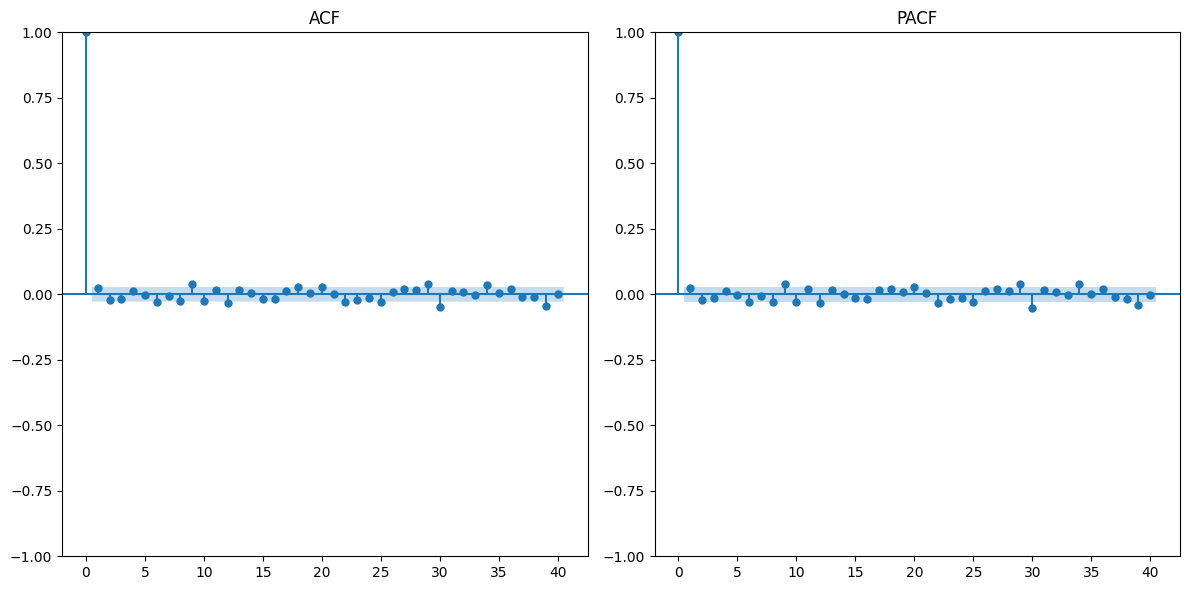

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supongamos que df['RET'] es tu serie de tiempo
series = df['RET']

# Visualización de la ACF y PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(series, lags=40, ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(series, lags=40, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()

In [146]:
def train_rolling_sarimax_multi(data, exog_vars, company_ids, window_size, forecast_step):
    params = {}
    predictions = {cid: [] for cid in company_ids}
    true_values = {cid: [] for cid in company_ids}
    mse_errors = {cid: [] for cid in company_ids}
    rmse_errors = {cid: [] for cid in company_ids}
    r2_scores = {cid: [] for cid in company_ids}
    prediction_dates = {cid: [] for cid in company_ids} 

    for cid in company_ids:
        params[cid] = None

    data = data.sort_values(by=['date', 'PERMNO'])

    num_companies = len(company_ids)
    total_iterations = (len(data) // num_companies) - window_size - forecast_step + 1

    expected_predictions = (len(data) // len(company_ids) - window_size) // forecast_step

    for start in range(0, len(data) - window_size - forecast_step + 1, forecast_step):
        end = start + window_size

        for cid in company_ids:
            company_data = data[data['PERMNO'] == cid]
            train_data = company_data.iloc[start:end]
            test_data = company_data.iloc[end:end + forecast_step]

            if len(train_data) == window_size and len(test_data) == forecast_step:
                
                scaler = StandardScaler()
                train_data = train_data.copy()
                train_data['RET'] = scaler.fit_transform(train_data[['RET']])
                test_data.loc[:, 'RET'] = scaler.transform(test_data[['RET']])
                train_data.set_index('date', inplace=True)
                test_data.set_index('date', inplace=True)

                if params[cid] is not None:
                    exog_train = train_data[exog_vars] if exog_vars else None
                    exog_test = test_data[exog_vars] if exog_vars else None
                    model = SARIMAX(train_data['RET'],
                                    exog=exog_train,
                                    order=params[cid]['order'],
                                    seasonal_order=params[cid]['seasonal_order'])
                    results = model.filter(params[cid]['params'])
                else:
                    exog_train = train_data[exog_vars] if exog_vars else None
                    model = SARIMAX(train_data['RET'],
                                    exog=exog_train,
                                    order=(0, 0, 0),
                                    seasonal_order=(1, 0, 1, 5))
                    results = model.fit(disp=False)
                    params[cid] = {'order': (0, 0, 0), 'seasonal_order': (1, 0, 1, 5), 'params': results.params}

                exog_test = test_data[exog_vars] if exog_vars else None
                if exog_test is not None and len(exog_test) >= forecast_step:
                    pred_scaled = results.get_forecast(steps=forecast_step, exog=exog_test).predicted_mean
                    pred_scaled = pred_scaled.to_numpy().reshape(-1, 1)
                    #Inverse scale
                    pred = scaler.inverse_transform(pred_scaled).flatten()

                
                    predictions[cid].extend(pred)
                    true_values[cid].extend(scaler.inverse_transform(test_data[['RET']]).flatten())
                    prediction_dates[cid].extend(test_data.index) 

    avg_mse = 0
    avg_rmse = 0
    avg_r2 = 0
    count = 0

    for cid in company_ids:
        if predictions[cid]:
            all_preds = np.array(predictions[cid])
            all_trues = np.array(true_values[cid])
            mse = mean_squared_error(all_trues, all_preds)
            rmse = np.sqrt(mse)
            r2 = r2_score(all_trues, all_preds)
            mse_errors[cid].append(mse)
            rmse_errors[cid].append(rmse)
            r2_scores[cid].append(r2)
            avg_mse += mse
            avg_rmse += rmse
            avg_r2 += r2
            count += 1

    avg_mse /= count
    avg_rmse /= count
    avg_r2 /= count

    #print(f"Expected number of predictions: {expected_predictions}")
    #print(f"Actual number of predictions: {len(predictions[company_ids[0]])}")

    return predictions, mse_errors, rmse_errors, r2_scores, avg_mse, avg_rmse, avg_r2, prediction_dates
    
company_ids = df['PERMNO'].unique()
predictions, mse_errors, rmse_errors, r2_scores, avg_mse, avg_rmse, avg_r2, prediction_dates  = train_rolling_sarimax_multi(df, ['PRC', 'VOL', 'sprtrn', 'BIDLO'], company_ids, window_size=wind, forecast_step=fc_step)
#
#for cid in predictions:
  #  print(f"Predictions for {cid}:")
 #   for date, pred in zip(prediction_dates[cid], predictions[cid]):
   #     print(f"Date: {date}, Prediction: {pred}")

for cid in mse_errors:
    print(f"MSE for {cid}: {mse_errors[cid]}")
    print(f"RMSE for {cid}: {rmse_errors[cid]}")
    print(f"R2 for {cid}: {r2_scores[cid]}")

print(f"Average MSE: {avg_mse}")
print(f"Average RMSE: {avg_rmse}")
print(f"Average R2: {avg_r2}")

def optimize_portfolio_gurobi(mean_returns, cov_matrix, risk_free_rate, target_risk):
    num_assets = len(mean_returns)
    model = gp.Model("portfolio_optimization")

    # Variables: weights of the assets in the portfolio
    weights = model.addVars(num_assets, lb=0, name='weights')

    # Portfolio return
    portfolio_return = gp.quicksum(weights[i] * mean_returns[i] for i in range(num_assets))

    # Portfolio variance
    portfolio_variance = gp.quicksum(weights[i] * weights[j] * cov_matrix[i][j] 
                                     for i in range(num_assets) for j in range(num_assets))

    portfolio_std = model.addVar(lb=0, name='portfolio_std')

    # Square of the standard deviation equals the variance
    model.addQConstr(portfolio_std * portfolio_std == portfolio_variance, name='std_deviation')

    # Calculate excess return
    excess_return = portfolio_return - risk_free_rate

    # Objective: maximize excess return subject to risk constraint
    model.setObjective(excess_return, GRB.MAXIMIZE)

     # Max weight
    max_weight=0.3
    model.addConstrs((weights[i] <= max_weight for i in range(num_assets)), "max_weight")


    # Constraints
    model.addConstr(gp.quicksum(weights[i] for i in range(num_assets)) == 1, "budget") # Asign all
    model.addConstr(portfolio_variance <= target_risk ** 2, "risk_constraint")  # Risk constraint

    # Optimize the model
    model.optimize()

    if model.Status == GRB.OPTIMAL:
        optimized_weights = np.array([weights[i].X for i in range(num_assets)])
        print("Optimized weights:", optimized_weights)
        return optimized_weights
    else:
        print(f"Optimization was unsuccessful. Status code: {model.Status}")
        return None

#company_ids = df['PERMNO'].unique()
#predictions, mse_errors, rmse_errors, r2_scores, avg_mse, avg_rmse, avg_r2, prediction_dates  = train_rolling_sarimax_multi(df, ['EXCHCD', 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL'], company_ids, window_size=wind, forecast_step=fc_step)

# Convert predictions to DataFrame and drop NaNs


pred_df = pd.DataFrame(predictions)

flat_dates = []
for cid in company_ids:
    flat_dates.extend(prediction_dates[cid])

#DataFrame for dates
pred_dates_df = pd.DataFrame({'date': flat_dates})

pred_dates_df['date'] = pd.to_datetime(pred_dates_df['date'])

pred_df['date'] = pred_dates_df['date']
pred_df.set_index('date', inplace=True)

#Convert to number
pred_df = pred_df.apply(pd.to_numeric, errors='coerce')
pred_df.dropna(inplace=True)

#pred_df = pred_df.apply(pd.to_numeric, errors='coerce')
#pred_df.dropna(inplace=True)

# Expected returns and covariance matrix
mean_returns = pred_df.mean().values
cov_matrix = pred_df.cov().values

monthly_returns = pred_df.resample('M').sum()
mean_returns_monthly = monthly_returns.mean().values
cov_matrix_monthly = monthly_returns.cov().values 

# Annual returns and covariance matrix
annual_returns = pred_df.resample('Y').sum()
mean_returns_annual = annual_returns.mean().values
cov_matrix_annual = annual_returns.cov().values 

#Optimization function for daily, monthly, and annual data
risk_free_rate_daily = 0.042/252

optimized_weights_daily = optimize_portfolio_gurobi(mean_returns, cov_matrix, risk_free_rate=risk_free_rate_daily, target_risk=0.9)
optimized_weights_monthly = optimize_portfolio_gurobi(mean_returns_monthly, cov_matrix_monthly, risk_free_rate=0.042/12, target_risk=0.9)
optimized_weights_annual = optimize_portfolio_gurobi(mean_returns_annual, cov_matrix_annual, risk_free_rate=0.042, target_risk=0.9)

print("Optimized portfolio weights (Daily):")
for cid, weight in zip(company_ids, optimized_weights_daily):
    print(f"{cid}: {weight:.4f}")

print("Optimized portfolio weights (Monthly):")
for cid, weight in zip(company_ids, optimized_weights_monthly):
    print(f"{cid}: {weight:.4f}")

print("Optimized portfolio weights (Annual):")
for cid, weight in zip(company_ids, optimized_weights_annual):
    print(f"{cid}: {weight:.4f}")

def calculate_portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def calculate_equal_weighted_return(mean_returns):
    num_assets = len(mean_returns)
    equal_weights = np.full(num_assets, 1 / num_assets)  # Equal weights
    expected_portfolio_return = np.dot(equal_weights, mean_returns)
    return expected_portfolio_return, equal_weights

#optimized portfolio
expected_return, expected_std = calculate_portfolio_performance(optimized_weights_daily, mean_returns, cov_matrix)
print(f'Expected portfolio return: {expected_return}')
print(f'Portfolio risk (standard deviation): {expected_std}')

expected_return_monthly, expected_std_monthly = calculate_portfolio_performance(optimized_weights_monthly, mean_returns_monthly, cov_matrix_monthly)
print(f'Expected monthly portfolio return: {expected_return_monthly:.6f}')
print(f'Monthly portfolio risk (standard deviation): {expected_std_monthly:.6f}')

#Annual portfolio
expected_return_annual, expected_std_annual = calculate_portfolio_performance(optimized_weights_annual, mean_returns_annual, cov_matrix_annual)
print(f'Expected annual portfolio return: {expected_return_annual:.6f}')
print(f'Annual portfolio risk (standard deviation): {expected_std_annual:.6f}')

risk_free_rate_annual = 0.042 
excess_return_annual = expected_return - risk_free_rate_annual
sharpe_ratio_annual = excess_return_annual / expected_std

#Sharpe Ratio annual
print(f'Annual Sharpe Ratio: {sharpe_ratio_annual:.4f}')

risk_free_rate_monthly = risk_free_rate_annual/12 
excess_return_monthly = monthly_returns.mean().mean() - risk_free_rate_monthly

#Sharpe Ratio monthly
sharpe_ratio_monthly = excess_return_monthly / monthly_returns.std().mean()

print(f'Monthly Sharpe Ratio: {sharpe_ratio_monthly:.4f}')

#Equal weighted
equal_weighted_return, equal_weights = calculate_equal_weighted_return(mean_returns)
equal_weighted_risk = np.sqrt(np.dot(equal_weights.T, np.dot(cov_matrix, equal_weights)))

#Sharpe Ratio equal weight
risk_free_rate = 0.0000397 # 0.01/252
excess_return_equal_weighted = equal_weighted_return - risk_free_rate
equal_weighted_sharpe_ratio = excess_return_equal_weighted / equal_weighted_risk

print(f'Equal weighted portfolio return: {equal_weighted_return}')
print(f'Equal weighted portfolio risk (standard deviation): {equal_weighted_risk}')
print(f'Equal weighted portfolio Sharpe Ratio: {equal_weighted_sharpe_ratio}')


MSE for 10107.0: [0.00013203268017102174]
RMSE for 10107.0: [0.0114905474269515]
R2 for 10107.0: [0.6189412896377631]
MSE for 11850.0: [0.0003413077853937012]
RMSE for 11850.0: [0.018474517189731948]
R2 for 11850.0: [-0.11735132004919624]
MSE for 13407.0: [0.0006949506317736099]
RMSE for 13407.0: [0.026361916314517234]
R2 for 13407.0: [0.2783830626248526]
MSE for 14541.0: [0.00018884733344526813]
RMSE for 14541.0: [0.013742173534243705]
R2 for 14541.0: [0.3311251044163046]
MSE for 14593.0: [9.264087353930729e-05]
RMSE for 14593.0: [0.009625012911124187]
R2 for 14593.0: [0.6776019166183919]
MSE for 21936.0: [0.0001376136955233352]
RMSE for 21936.0: [0.011730886391204001]
R2 for 21936.0: [0.3219775523861067]
MSE for 47896.0: [0.00014932130370996348]
RMSE for 47896.0: [0.012219709640984252]
R2 for 47896.0: [0.3336559912434708]
MSE for 59408.0: [0.00016693217201342448]
RMSE for 59408.0: [0.012920223373201582]
R2 for 59408.0: [0.47528534730477556]
MSE for 65875.0: [0.00022133919276043015]
R

: 

# 5. Prescriptive Analysis (Rolling Windows and Allocating Weights)

## 5.1 Approach 1 - Use CVXPY to handle mixed-integer quadratic programming (MIQP) ###
Goal: Choose 5 stocks for each holding period and allocate weights only to those 5 stocks.
Input: Use the predicted returns by the best Random Forest Model (section 4.2.2) for weight allocation.

In [147]:
# import required packages
import cvxpy as cp

# Define risk-free rate
# For long-term analysis(monthly or annual), we consider long-term risk-free rates, for example: 10-Year Treasury Yield
risk_free_rate_annual = 0.042
# Convert annual risk-free rate to daily rate
trading_days_per_month = 21  # average trading days in a month
trading_days_per_year = 250  # Adjust based on your specific trading days
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1 / trading_days_per_year) - 1

# Stock list
#stocks = ['AAPL', 'BAC', 'CVX', 'GOOGL', 'JPM', 'META', 'MSFT', 'PFE', 'VZ', 'XOM']

# Initialize results list to store the outputs for each month
results = []

# Iterate over each month's prediction results in pred_returns
for final_output in pred_returns:
    # Step 1: Drop the unnecessary columns
    pred_ret = final_output.drop(columns=['PERMNO', 'Actual_RET'])

    # Pivot the DataFrame
    pivoted_ret = pred_ret.pivot(index='date', columns='TICKER_x', values='Predicted_RET')

    rets = np.transpose(np.array(pivoted_ret))   # matrix of daily predicted returns
    delta = np.mean(rets, axis=1)                # mean predicted return
    sigma = np.cov(rets)                         # covariance
    std = np.std(rets, axis=1)                   # standard deviation

    # Use cvxpy to handle mixed-integer quadratic programming (MIQP)
    # Define variables
    w = cp.Variable(len(delta))  # weights of the stocks
    y = cp.Variable(len(delta), boolean=True)  # selection variables

    # Define the portfolio return and risk
    portfolio_return = cp.sum(cp.multiply(delta, w))
    portfolio_variance = cp.quad_form(w, sigma)
    portfolio_risk = cp.sqrt(portfolio_variance)

    # Objective: maximize excess return subject to risk constraint
    excess_return = portfolio_return - risk_free_rate_daily

    # Set a target risk level (e.g., based on acceptable risk or a percentile)
    target_risk_daily = 0.05  # This can be adjusted

    # Objective: Maximize excess return
    objective = cp.Maximize(excess_return)

    # Constraints
    constraints = [
        cp.sum(w) == 1,            # Weights sum to 1
        cp.sum(y) == 5,            # Select exactly 5 stocks
        w <= y,                    # Link weights and selection variables
        w >= 0,                    # Weights are non-negative
        y >= 0,                    # Selection variables are non-negative
        w <= 0.35,                 # Each stock weight less than 35%
       #w >= 0.01,                 # Each stock weight more than 1% (when I set this constraint, there is no solution to my model)
        portfolio_variance <= target_risk_daily ** 2  # Risk constraint
    ]

    # Define and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Output the results
    selected_stocks_indices = [i for i in range(len(delta)) if y.value[i] > 0.5]
    selected_stocks = pivoted_ret.columns[selected_stocks_indices]

    # Calculate daily Sharpe Ratio
    sharpe_ratio_daily = (portfolio_return.value - risk_free_rate_daily) / portfolio_risk.value

    # Get the month of the prediction from the final_output dataframe
    prediction_month = final_output['date'].iloc[0].strftime('%Y-%m')

    result = {
        "Month": prediction_month,
        "Selected Stocks": list(selected_stocks),
        "Weights": {selected_stocks[i]: w.value[selected_stocks_indices[i]] for i in range(len(selected_stocks_indices))},
        "Total Weight": sum(w.value[i] for i in selected_stocks_indices),
        "Daily Portfolio Return": portfolio_return.value,
        "Daily Portfolio Risk": portfolio_risk.value,
        "Daily Sharpe Ratio": sharpe_ratio_daily
    }
    results.append(result)

# Print the results for each month
for res in results:
    print(f"Month: {res['Month']}")
    print(f"Selected stocks: {res['Selected Stocks']}")
    print(f"Weights: {res['Weights']}")
    print(f"Total Weight: {res['Total Weight']}")
    print(f"Daily Portfolio Return: {res['Daily Portfolio Return']}")
    print(f"Daily Portfolio Risk: {res['Daily Portfolio Risk']}")
    print(f"Daily Sharpe Ratio: {res['Daily Sharpe Ratio']}")

**Weight Allocation Result using CVXPY**

Month: 2023-01
Selected stocks: ['AAPL', 'BAC', 'PFE', 'VZ', 'XOM']
Weights: {'AAPL': 7.463808693818066e-10, 'BAC': 0.3499835694322, 'PFE': 0.34999998447549613, 'VZ': 0.30000286137255366, 'XOM': 1.3583973369405214e-05}
Total Weight: 0.9999999999999999
Daily Portfolio Return: -0.0009875702937318961
Daily Portfolio Risk: 0.005359412955221071
Daily Sharpe Ratio: -0.21497720341795187

Month: 2023-02
Selected stocks: ['AAPL', 'BAC', 'META', 'VZ', 'XOM']
Weights: {'AAPL': 0.0, 'BAC': 0.0, 'META': 0.35, 'VZ': 0.3, 'XOM': 0.35}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.0032246740310230932
Daily Portfolio Risk: 0.006784625856151606
Daily Sharpe Ratio: 0.4510333776040197

Month: 2023-03
Selected stocks: ['AAPL', 'BAC', 'META', 'VZ', 'XOM']
Weights: {'AAPL': 1.1371426270688598e-07, 'BAC': 7.309484592446026e-08, 'META': 0.3499993015360998, 'VZ': 0.3000052028438543, 'XOM': 0.34999530881093716}
Total Weight: 0.9999999999999998
Daily Portfolio Return: 0.001580411236286463
Daily Portfolio Risk: 0.006680534552926088
Daily Sharpe Ratio: 0.21193362742549637

Month: 2023-04
Selected stocks: ['AAPL', 'GOOGL', 'META', 'MSFT', 'XOM']
Weights: {'AAPL': 0.0, 'GOOGL': 0.3, 'META': 0.35, 'MSFT': 0.35, 'XOM': 0.0}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.0035731806575940365
Daily Portfolio Risk: 0.006748717455663891
Daily Sharpe Ratio: 0.5050736476439511

Month: 2023-05
Selected stocks: ['BAC', 'GOOGL', 'META', 'MSFT', 'XOM']
Weights: {'BAC': 0.0, 'GOOGL': 0.3, 'META': 0.35, 'MSFT': 0.35, 'XOM': 0.0}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.020887069407725826
Daily Portfolio Risk: 0.007508377829525241
Daily Sharpe Ratio: 2.7599154654811304

Month: 2023-06
Selected stocks: ['AAPL', 'BAC', 'GOOGL', 'META', 'XOM']
Weights: {'AAPL': 0.3000011549594932, 'BAC': 1.0742198317488841e-08, 'GOOGL': 0.34999890240210274, 'META': 0.3499999018880041, 'XOM': 3.00082014842963e-08}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.002668267209427049
Daily Portfolio Risk: 0.005842687497740203
Daily Sharpe Ratio: 0.4285161400557428

Month: 2023-07
Selected stocks: ['AAPL', 'BAC', 'META', 'MSFT', 'XOM']
Weights: {'AAPL': 0.35, 'BAC': 0.0, 'META': 0.35, 'MSFT': 0.3, 'XOM': 0.0}
Total Weight: 1.0
Daily Portfolio Return: 0.003984676978393617
Daily Portfolio Risk: 0.0027804649128112474
Daily Sharpe Ratio: 1.3739053657712799

Month: 2023-08
Selected stocks: ['AAPL', 'BAC', 'META', 'MSFT', 'XOM']
Weights: {'AAPL': 0.3000062026096412, 'BAC': 2.99638684957723e-07, 'META': 0.34999999683399685, 'MSFT': 0.34999344498647555, 'XOM': 5.593120146489463e-08}
Total Weight: 1.0000000000000002
Daily Portfolio Return: 0.005116185255068099
Daily Portfolio Risk: 0.0036294091792847417
Daily Sharpe Ratio: 1.3643002745423307

Month: 2023-09
Selected stocks: ['AAPL', 'BAC', 'GOOGL', 'META', 'XOM']
Weights: {'AAPL': 0.3499892664241751, 'BAC': 1.8360605555663265e-07, 'GOOGL': 0.34999998947037936, 'META': 0.30000920388886787, 'XOM': 1.3566105221463526e-06}
Total Weight: 1.0000000000000002
Daily Portfolio Return: 0.0025572231971859333
Daily Portfolio Risk: 0.0028728820065292426
Daily Sharpe Ratio: 0.8328368086140222

Month: 2023-10
Selected stocks: ['AAPL', 'CVX', 'GOOGL', 'META', 'XOM']
Weights: {'AAPL': 0.0, 'CVX': 0.3, 'GOOGL': 0.35, 'META': 0.35, 'XOM': 0.0}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.0015205744024523343
Daily Portfolio Risk: 0.001794461155169863
Daily Sharpe Ratio: 0.7556547452711541

Month: 2023-11
Selected stocks: ['AAPL', 'BAC', 'META', 'MSFT', 'XOM']
Weights: {'AAPL': 0.30000284179294534, 'BAC': 1.904947299014175e-08, 'META': 0.34999810928264524, 'MSFT': 0.34999874945518744, 'XOM': 2.804197489647705e-07}
Total Weight: 1.0
Daily Portfolio Return: 0.00044624976586861307
Daily Portfolio Risk: 0.0034421522247937457
Daily Sharpe Ratio: 0.0818291673727533

Month: 2023-12
Selected stocks: ['AAPL', 'BAC', 'META', 'MSFT', 'XOM']
Weights: {'AAPL': 0.0003161637965965417, 'BAC': 0.34885260314693806, 'META': 0.30083946481429014, 'MSFT': 0.3499896544059162, 'XOM': 2.1138362590113302e-06}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.002299496875191702
Daily Portfolio Risk: 0.002265659526620786
Daily Sharpe Ratio: 0.9422931975275392

**Approach 1- Calculate the return, risk and Sharpe ratio for the whole investment period (12 months or one year) based on allocated weights and actual returns**

Investment constraint: Only invest when predicted portfolio return > 0

In [ ]:
df = merged_stock_df.copy()  # Make a copy of the merged dataset
df

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn
0,10107.0,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
1,10107.0,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
2,10107.0,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
3,10107.0,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
4,10107.0,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,90319.0,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5065,90319.0,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5066,90319.0,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5067,90319.0,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785


In [ ]:
# Initialize variables to accumulate annual performance
annual_return = 0
monthly_returns = []

# Loop through each month result and calculate monthly and annual metrics
for month, res in enumerate(results):
    prediction_start_date = pd.to_datetime(f'2023-{month+1:02d}-01')
    prediction_end_date = (prediction_start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    predicted_return = res['Daily Portfolio Return']
    actual_return = 0

    if predicted_return > 0:
        # Calculate actual monthly return if predicted return is positive
        month_data = df[(df['date'] >= prediction_start_date) & (df['date'] <= prediction_end_date)]
        selected_stocks = res['Selected Stocks']
        weights = res['Weights']

        for stock in selected_stocks:
            weight = weights[stock]
            stock_data = month_data[month_data['TICKER_x'] == stock]
            if not stock_data.empty:
                monthly_return = (1 + stock_data['RET']).prod() - 1
                actual_return += weight * monthly_return

    # Add monthly return to list
    monthly_returns.append(actual_return)

    # Accumulate the annual return
    annual_return += actual_return

# Convert monthly returns to a DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns, columns=['Monthly Return'])

# Calculate annualized portfolio risk
# First, calculate monthly portfolio returns in percentage
monthly_returns_percentage = np.array(monthly_returns)

# Then calculate annualized standard deviation (risk)
annualized_risk = np.std(monthly_returns_percentage) * np.sqrt(12)  # Assuming 12 months in a year

# Calculate annual Sharpe Ratio
excess_return_annual = annual_return - risk_free_rate_annual
sharpe_ratio_annual = excess_return_annual / annualized_risk


print("\nTotal Annual Return:", annual_return)
print("Annualized Risk:", annualized_risk)
print("Annual Sharpe Ratio:", sharpe_ratio_annual)

# Print the results for each month
for res, monthly_return in zip(results, monthly_returns):
    print(f"Month: {res['Month']}")
    print(f"Actual Monthly Return: {monthly_return}")

NameError: name 'results' is not defined

## 5.2 Approach 2 - Calculating optimal weights and optimal returns using Rolling Windows and Quadratic Programming in Gurobi 

In [ ]:
#Split the input data into different dataframes for each company
merged_stock_df["PERMNO"] = merged_stock_df["PERMNO"].astype(float).astype(int)
merged_stock_df["date"] = pd.to_datetime(merged_stock_df["date"])

#One-hot encoding for TICKER_x and 'EXCHANGE' columns
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['TICKER_x', 'EXCHCD']
encoded_features = encoder.fit_transform(merged_stock_df[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['TICKER_x', 'EXCHCD']))

#Concatenate encoded dataset with original input dataset and drop "TICKER_x" and "EXCHCD" columns
input_data = pd.concat([merged_stock_df, encoded_features_df], axis=1)
input_data

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,TICKER_x_FB,TICKER_x_GOOGL,TICKER_x_JPM,TICKER_x_META,TICKER_x_MSFT,TICKER_x_PFE,TICKER_x_VZ,TICKER_x_XOM,EXCHCD_0.0,EXCHCD_1.0
0,10107,2022-01-03,1.0,MSFT,0.0,0.105639,0.103934,0.105485,0.120568,0.521884,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,10107,2022-01-04,1.0,MSFT,0.0,0.104370,0.103002,0.103529,0.137041,0.496762,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10107,2022-01-05,1.0,MSFT,0.0,0.100856,0.099964,0.099226,0.168802,0.454000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10107,2022-01-06,1.0,MSFT,0.0,0.099300,0.097512,0.098374,0.167876,0.515374,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,10107,2022-01-07,1.0,MSFT,0.0,0.098815,0.096780,0.098428,0.137205,0.532309,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,1.0,GOOGL,0.0,0.040115,0.038712,0.039634,0.110055,0.546622,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5006,90319,2023-12-26,1.0,GOOGL,0.0,0.040281,0.038941,0.039645,0.067980,0.531709,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5007,90319,2023-12-27,1.0,GOOGL,0.0,0.039829,0.038742,0.039253,0.079919,0.514923,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5008,90319,2023-12-28,1.0,GOOGL,0.0,0.039782,0.038429,0.039205,0.065117,0.529275,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
vars = [ 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD',
         'RET', 'RETX', 'sprtrn',
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Define lag period
lag_period = 21

# Function to create lagged features for a single stock's data
def create_lagged_features(group, lag_period, vars):
    for var in vars:
        group[f'{var}_lag{lag_period}'] = group[var].shift(lag_period)
    return group

# Apply the lagged feature creation function to each stock's data
input_data_lag_21 = input_data.copy()
input_data_lag_21 = input_data_lag_21.groupby('PERMNO').apply(create_lagged_features, lag_period=lag_period, vars=vars)
input_data_lag_21 = input_data_lag_21.reset_index(drop=True)

#Drop missing data in input_data_lag_21
input_data_lag_21 = input_data_lag_21.dropna()
#How many days in August 2022 which mean more than 2022-08-01 and smaller than 2022-08-31
print(len(input_data_lag_21[(input_data_lag_21['date'] >= '2022-08-01') & (input_data_lag_21['date'] <= '2022-08-31')]))

230


In [ ]:
#Liste the column names of input_data_lag_21
input_data_lag_21.columns

Index(['PERMNO', 'date', 'EXCHCD', 'TICKER_x', 'DIVAMT', 'BIDLO', 'ASKHI',
       'PRC', 'VOL', 'RET', 'SHROUT', 'OPENPRC', 'NUMTRD', 'RETX', 'sprtrn',
       'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
       'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn',
       'at_turn', 'Month', 'TICKER_x_AAPL', 'TICKER_x_BAC', 'TICKER_x_CVX',
       'TICKER_x_FB', 'TICKER_x_GOOGL', 'TICKER_x_JPM', 'TICKER_x_META',
       'TICKER_x_MSFT', 'TICKER_x_PFE', 'TICKER_x_VZ', 'TICKER_x_XOM',
       'EXCHCD_0.0', 'EXCHCD_1.0', 'DIVAMT_lag21', 'BIDLO_lag21',
       'ASKHI_lag21', 'PRC_lag21', 'VOL_lag21', 'SHROUT_lag21',
       'OPENPRC_lag21', 'NUMTRD_lag21', 'RET_lag21', 'RETX_lag21',
       'sprtrn_lag21', 'pe_exi_lag21', 'pe_inc_lag21', 'dpr_lag21',
       'npm_lag21', 'gpm_lag21', 'roa_lag21', 'roe_lag21', 'debt_at_lag21',
       'dltt_be_lag21', 'intcov_ratio_lag21', 'quick_ratio_lag21',
       'curr_ratio_lag21', 'inv_turn_lag21', 'at_turn_lag21'],
      dty

In [ ]:
# List of columns to convert to string type
columns_to_convert = ['PERMNO','TICKER_x_AAPL', 'TICKER_x_BAC', 'TICKER_x_CVX',
       'TICKER_x_FB', 'TICKER_x_GOOGL', 'TICKER_x_JPM', 'TICKER_x_META',
       'TICKER_x_MSFT', 'TICKER_x_PFE', 'TICKER_x_VZ', 'TICKER_x_XOM',
       'EXCHCD_1.0', 'EXCHCD_0.0']

# Convert the specified columns to string type
input_data_lag_21[columns_to_convert] = input_data_lag_21[columns_to_convert].astype(str)
input_data_lag_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 21 to 5009
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PERMNO              4800 non-null   object        
 1   date                4800 non-null   datetime64[ns]
 2   EXCHCD              4800 non-null   float64       
 3   TICKER_x            4800 non-null   object        
 4   DIVAMT              4800 non-null   float64       
 5   BIDLO               4800 non-null   float64       
 6   ASKHI               4800 non-null   float64       
 7   PRC                 4800 non-null   float64       
 8   VOL                 4800 non-null   float64       
 9   RET                 4800 non-null   float64       
 10  SHROUT              4800 non-null   float64       
 11  OPENPRC             4800 non-null   float64       
 12  NUMTRD              4800 non-null   float64       
 13  RETX                4800 non-null   float64       
 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = input_data_lag_21.select_dtypes(include=['float', 'int']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
input_data_lag_21[numerical_cols] = scaler.fit_transform(input_data_lag_21[numerical_cols])
input_data_lag_21_scaled = input_data_lag_21.copy()
input_data_lag_21_scaled

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107,2022-02-02,1.224745,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.740363,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
22,10107,2022-02-03,1.224745,MSFT,-0.097961,0.322587,0.330736,0.315128,0.626288,-1.931790,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
23,10107,2022-02-04,1.224745,MSFT,-0.097961,0.322614,0.324222,0.327896,0.247610,0.757429,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
24,10107,2022-02-07,1.224745,MSFT,-0.097961,0.322421,0.321648,0.314312,-0.038931,-0.814965,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
25,10107,2022-02-08,1.224745,MSFT,-0.097961,0.322559,0.315539,0.324139,0.131834,0.581190,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,1.224745,GOOGL,-0.097961,-0.117128,-0.122962,-0.119787,-0.130044,0.365391,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5006,90319,2023-12-26,1.224745,GOOGL,-0.097961,-0.115803,-0.121113,-0.119706,-0.555503,-0.000011,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5007,90319,2023-12-27,1.224745,GOOGL,-0.097961,-0.119403,-0.122721,-0.122836,-0.434780,-0.411286,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5008,90319,2023-12-28,1.224745,GOOGL,-0.097961,-0.119779,-0.125241,-0.123217,-0.584449,-0.059645,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064


The data is split into two time periods: one for training the model and another for making predictions. A Random Forest model is trained on past stock data, and then used to predict returns for a future period. These predictions are compared to actual returns, and the results are organized for further analysis. The code also calculates expected returns for each stock and the covariance between their predicted returns.

### Optimisation Function Development
The portfolio consists of 10 assets, with constraints ensuring the sum of weights equals one, limiting turnover from previous weights (10%), and capping individual asset weights (25%). The objective function maximizes the Sharpe ratio, adjusted for risk, while controlling the portfolio's overall risk through a variance constraint (5% per day). The function returns the optimized asset weights, providing a balanced portfolio that aims to maximize returns while managing risk.


In [ ]:
from gurobipy import Model, quicksum, GRB
import numpy as np
import pandas as pd
import math
#Optimization function using Gurobi
def optimized_weights_function(expected_returns,
                      cov_matrix,
                      prev_weights=None,
                      turnover_limit=0.20,
                      max_position_limit=0.25,
                      risk_free_rate=0.042):
    n = len(expected_returns)
    model = Model()

    # Variables: weights of the assets in the portfolio
    weights = model.addVars(n, lb=0, ub=max_position_limit, name="weights")

    # Objective: Maximize Exceeded Return
    portfolio_return = quicksum(weights[i] * expected_returns[i] for i in range(n))

    # Correctly access covariance matrix elements
    portfolio_variance = quicksum(weights[i] * weights[j] * cov_matrix.iloc[i, j]
                                 for i in range(n) for j in range(n))
    
    # Auxiliary variable for the standard deviation
    portfolio_std_dev = model.addVar(name="portfolio_std_dev")
    model.addConstr(portfolio_std_dev * portfolio_std_dev == portfolio_variance, "std_dev_constraint")

    # Maximize Exceeded Return
    model.setObjective((portfolio_return - risk_free_rate), GRB.MAXIMIZE)

    # Add portfolio variance as a constraint to control risk
    model.addConstr(portfolio_variance <= 0.0004, "risk_constraint")

    # Constraints:
    # Sum of weights equals 1
    model.addConstr(quicksum(weights[i] for i in range(n)) == 1, "sum_weights")
    # Turnover limit
    if prev_weights is not None:
        model.addConstr(quicksum(abs(weights[i] - prev_weights[i]) for i in range(n)) <= turnover_limit, "turnover_limit")

    model.optimize()

    optimized_weights = np.array([weights[i].x for i in range(n)])
    return optimized_weights

## Applying the Optimising Function to the Prediction dataset
- The step below developed rolling window optimization function for predicted returns taken from best Random Forest model. 
- It iterates through each month in 2023, using the previous six months of data to train the model and predict stock returns for the upcoming month. 
- The predicted returns are used to calculate expected returns and the covariance matrix, which then informs the optimization of portfolio weights. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define the rolling window optimization function
def rolling_window_optimization(input_data, exclude_cols):
    results = []

    for month in range(1, 13):
        # Define prediction date range
        prediction_start_date = pd.to_datetime(f'2023-{month:02d}-01')
        prediction_end_date = (prediction_start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

        # Define rolling window start and end dates for training (6 months prior to prediction start date)
        start_date = prediction_start_date - pd.DateOffset(months=6)
        end_date = prediction_start_date - pd.DateOffset(days=1)

        # Filter 6 months data for training
        train_data = input_data.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, start_date, end_date)).reset_index(drop=True)
        train_data.columns = train_data.columns.astype(str)
        input_cols = train_data.columns.difference(exclude_cols)
        X_train = train_data[input_cols]
        y_train = train_data['RET']

        # Filter 1 month data for prediction
        predict_data = input_data.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, prediction_start_date, prediction_end_date)).reset_index(drop=True)
        predict_data.columns = predict_data.columns.astype(str)
        X_test = predict_data[input_cols]
        y_test = predict_data['RET']

        # Fit the Random Forest model
        forest = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10,
                                       min_samples_split=10, min_samples_leaf=1, max_features=None)
        forest.fit(X_train, y_train)
        # Make predictions
        y_pred = forest.predict(X_test)

        # Reverse the standardization of predictions
        y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

        # Combine predictions with corresponding permnos and dates
        predict_data['Predicted_RET'] = y_pred_original
        predict_data['Actual_RET'] = y_test_original

        # Select relevant columns for final output
        final_output = predict_data[['PERMNO', 'date', 'TICKER_x', 'Predicted_RET', 'Actual_RET']]

        # Expected returns of final output
        predicted_returned_pivot = final_output.pivot(index='date', columns='TICKER_x', values='Predicted_RET')

        # Calculate expected returns per stock in this period
        expected_returns = predicted_returned_pivot.mean()

        # Calculate covariance returns
        cov_matrix = predicted_returned_pivot.cov()

        optimized_weight = optimized_weights_function(expected_returns, cov_matrix)

        # Store results
        results.append({
            'window_start': start_date,
            'window_end': end_date,
            'holding_start': prediction_start_date,
            'holding_end': prediction_end_date,
            'expected_returns': expected_returns,
            'covariance_matrix': cov_matrix,
            'weights': optimized_weight,
            'final_output': final_output, 
            'Daily Portfolio Return': np.dot(optimized_weight, expected_returns),
            'Daily Portfolio Risk': np.sqrt(np.dot(optimized_weight, np.dot(cov_matrix, optimized_weight))), 
            'Selected Stocks': final_output['TICKER_x'].unique()
            
        })

    return results

### This is monthly return prediction
# Define the columns to exclude from the input features
exclude_cols = ['PERMNO', 'date', 'Month', 'TICKER_x', 'RET']

# Load your input data (Replace with actual data loading)
input_data = input_data_lag_21_scaled

# Perform rolling window optimization
rolling_results = rolling_window_optimization(input_data, exclude_cols)

# Print the results for each month
for res in rolling_results:
    print(f"Window Start Date: {res['window_start']}")
    print(f"Window End Date: {res['window_end']}")
    print(f"Holding Start Date: {res['holding_start']}")
    print(f"Holding End Date: {res['holding_end']}")
    print(f"Expected Returns: {res['expected_returns']}")
    print(f"Covariance Matrix: {res['covariance_matrix']}")
    print(f"Optimized Weights: {res['weights']}")
    print(f"Final Output: {res['final_output']}")
    print(f"Daily Portfolio Return: {res['Daily Portfolio Return']}")
    print(f"Daily Portfolio Risk: {res['Daily Portfolio Risk']}")
    print(f"Selected Stocks: {res['Selected Stocks']}")

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 20.6.0 20G71)

CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 11 columns and 10 nonzeros
Model fingerprint: 0xeff61d62
Model has 2 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [7e-06, 1e+00]
  Objective range  [1e-03, 1e-02]
  Bounds range     [2e-01, 2e-01]
  RHS range        [1e+00, 1e+00]
  QRHS range       [4e-04, 4e-04]

Continuous model is non-convex -- solving as a MIP

Presolve time: 0.01s
Presolved: 215 rows, 67 columns, 481 nonzeros
Presolved model has 1 quadratic constraint(s)
Presolved model has 56 bilinear constraint(s)
Variable types: 67 continuous, 0 integer (0 binary)
Found heuristic solution: objective -0.0355124

Root relaxation: interrupted, 0 iterations, 0.00 second

### Calculate year Actual Returns, Risks and Sharpe Ratio using optimised weights

In [ ]:
new_df = merged_stock_df.copy()
# Convert the 'date' column to datetime format
new_df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Initialize variables to accumulate annual performance
annual_return = 0
monthly_returns = []
risk_free_rate_annual = 0.042

# Loop through each month result and calculate monthly and annual metrics
for month, res in enumerate(rolling_results):
    prediction_start_date = pd.to_datetime(f'2023-{month+1:02d}-01')
    prediction_end_date = (prediction_start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    predicted_return = res['Daily Portfolio Return']
    actual_return = 0

    if predicted_return > 0:
        # Calculate actual monthly return if predicted return is positive
        month_data = new_df[(new_df['date'] >= prediction_start_date) & (new_df['date'] <= prediction_end_date)]
        selected_stocks = ['AAPL','BAC', 'CVX', 'GOOGL', 'JPM', 'META', 'MSFT', 'PFE', 'VZ', 'XOM']
        weights = res['weights']

        for stock in selected_stocks:
            #choose weights based on the position of the stock in the selected stocks list
            weight = weights[selected_stocks.index(stock)]
            stock_data = month_data[month_data['TICKER_x'] == stock]
            if not stock_data.empty:
                monthly_return = (1 + stock_data['RET']).prod() - 1
                actual_return += weight * monthly_return

    # Add monthly return to list
    monthly_returns.append(actual_return)

    # Accumulate the annual return
    annual_return += actual_return

# Convert monthly returns to a DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns, columns=['Monthly Return'])

# Calculate annualized portfolio risk
# First, calculate monthly portfolio returns in percentage
monthly_returns_percentage = np.array(monthly_returns)

# Then calculate annualized standard deviation (risk)
annualized_risk = np.std(monthly_returns_percentage) * np.sqrt(12)  # Assuming 12 months in a year

# Calculate annual Sharpe Ratio
excess_return_annual = annual_return - risk_free_rate_annual
sharpe_ratio_annual = excess_return_annual / annualized_risk

final_results = {
    "Annual Portfolio Return (Approach 2)": f"{annual_return*100:.2f}%",
    "Annual Portfolio Risk (Approach 2)": f"{annualized_risk*100:.2f}%",
    "Annual Sharpe Ratio (Approach 2)": f"{sharpe_ratio_annual:.2f}"
}

final_results

{'Annual Portfolio Return (Approach 2)': '32.38%',
 'Annual Portfolio Risk (Approach 2)': '16.88%',
 'Annual Sharpe Ratio (Approach 2)': '1.67'}

# 6. Performance Assessment

**Benchmark 1: Equal-weight portfolio**

In [ ]:
# Initialize variables to accumulate annual performance
annual_return_equal = 0
monthly_returns_equal = []

# Loop through each month result and calculate monthly and annual metrics
for month in range(12):
    start_date = pd.to_datetime(f'2023-{month+1:02d}-01')
    end_date = (start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    # Calculate actual monthly return for equal-weighted portfolio
    month_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    monthly_actual_returns = month_data.groupby('TICKER_x')['RET'].apply(lambda x: (1 + x).prod() - 1).reset_index()

    equal_weight = 0.10
    actual_return = (monthly_actual_returns['RET'] * equal_weight).sum()

    # Add monthly return to list
    monthly_returns_equal.append((start_date.strftime('%Y-%m'), actual_return))

    # Accumulate the annual return
    annual_return_equal += actual_return

# Convert monthly returns to a DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns_equal, columns=['Year-Month', 'Monthly Return'])

# Calculate annualized portfolio risk
# First, calculate monthly portfolio returns in percentage
monthly_returns_percentage = np.array(monthly_returns_df['Monthly Return'])

# Then calculate annualized standard deviation (risk)
annualized_risk_equal = np.std(monthly_returns_percentage) * np.sqrt(12)  # Assuming 12 months in a year

# Calculate annual Sharpe Ratio
excess_return_annual = annual_return_equal - risk_free_rate_annual
sharpe_ratio_annual_equal = excess_return_annual / annualized_risk_equal

# Print the results
print("\nTotal Annual Return for Equal-weighted Portfolio:", annual_return_equal)
print("Annualized Risk for Equal-weighted Portfolio:", annualized_risk_equal)
print("Annual Sharpe Ratio for Equal-weighted Portfolio:", sharpe_ratio_annual_equal)

# Print the results for each month
for year_month, monthly_return_equal in monthly_returns_equal:
    print(f"Month: {year_month}")
    print(f"Actual Monthly Return for Equal-weighted Portfolio: {monthly_return_equal}")


Total Annual Return for Equal-weighted Portfolio: 0.23567135029797578
Annualized Risk for Equal-weighted Portfolio: 0.11866087618441365
Annual Sharpe Ratio for Equal-weighted Portfolio: 1.6321415830183708
Month: 2023-01
Actual Monthly Return for Equal-weighted Portfolio: 0.05874889737456319
Month: 2023-02
Actual Monthly Return for Equal-weighted Portfolio: -0.015216095894332341
Month: 2023-03
Actual Monthly Return for Equal-weighted Portfolio: 0.04064726148730962
Month: 2023-04
Actual Monthly Return for Equal-weighted Portfolio: 0.04369240107431967
Month: 2023-05
Actual Monthly Return for Equal-weighted Portfolio: -0.0026792829477152464
Month: 2023-06
Actual Monthly Return for Equal-weighted Portfolio: 0.04047174863769377
Month: 2023-07
Actual Monthly Return for Equal-weighted Portfolio: 0.0394411297190426
Month: 2023-08
Actual Monthly Return for Equal-weighted Portfolio: -0.023331069913639674
Month: 2023-09
Actual Monthly Return for Equal-weighted Portfolio: -0.023545173841188715
Mon

**Benchmark 2: S&P Composite Index**

In [ ]:
# Load the S&P Composite dataset into a Pandas Dataframe
s_p = pd.read_csv('Return on S&P Composite Index-2023.csv', header=0)
s_p.head()

,DATE,sprtrn
0,2023-01-03,-0.004001
1,2023-01-04,0.007539
2,2023-01-05,-0.011646
3,2023-01-06,0.022841
4,2023-01-09,-0.000768


In [ ]:
# Initialize variables to accumulate annual performance
annual_return_s_p = 0
monthly_returns_s_p = []

# Convert date column to datetime format
s_p['DATE'] = pd.to_datetime(s_p['DATE'])

# Loop through each month result and calculate monthly and annual metrics
for month in range(12):
    start_date = pd.to_datetime(f'2023-{month+1:02d}-01')
    end_date = (start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    # Calculate actual monthly return for equal-weighted portfolio
    month_data = s_p[(s_p['DATE'] >= start_date) & (s_p['DATE'] <= end_date)]
    # Calculate actual monthly return for S&P Composite Index
    monthly_actual_return = (1 + month_data['sprtrn']).prod() - 1

    # Add monthly return to list
    monthly_returns_s_p.append((start_date.strftime('%Y-%m'), monthly_actual_return))

    # Accumulate the annual return
    annual_return_s_p += monthly_actual_return

# Convert monthly returns to a DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns_s_p, columns=['Year-Month', 'Monthly Return'])

# Calculate annualized portfolio risk
# First, calculate monthly portfolio returns in percentage
monthly_returns_percentage = np.array(monthly_returns_df['Monthly Return'])

# Then calculate annualized standard deviation (risk)
annualized_risk_s_p = np.std(monthly_returns_percentage) * np.sqrt(12)  # Assuming 12 months in a year

# Calculate annual Sharpe Ratio
excess_return_annual = annual_return_s_p - risk_free_rate_annual
sharpe_ratio_annual_s_p = excess_return_annual / annualized_risk_s_p

# Print the results
print("\nTotal Annual Return for S&P Composite Index:", annual_return_s_p)
print("Annualized Risk for S&P Composite Index:", annualized_risk_s_p)
print("Annual Sharpe Ratio for S&P Composite Index:", sharpe_ratio_annual_s_p)

# Print the results for each month
for year_month, monthly_return_s_p in monthly_returns_s_p:
    print(f"Month: {year_month}")
    print(f"Actual Monthly Return for S&P Composite Index: {monthly_return_s_p}")


Total Annual Return for S&P Composite Index: 0.2286717876087213
Annualized Risk for S&P Composite Index: 0.1408036901587788
Annual Sharpe Ratio for S&P Composite Index: 1.3257591999060454
Month: 2023-01
Actual Monthly Return for S&P Composite Index: 0.06175077573839571
Month: 2023-02
Actual Monthly Return for S&P Composite Index: -0.02611363977213843
Month: 2023-03
Actual Monthly Return for S&P Composite Index: 0.03505299660820427
Month: 2023-04
Actual Monthly Return for S&P Composite Index: 0.014642652863053884
Month: 2023-05
Actual Monthly Return for S&P Composite Index: 0.002482705725674217
Month: 2023-06
Actual Monthly Return for S&P Composite Index: 0.06472687309789893
Month: 2023-07
Actual Monthly Return for S&P Composite Index: 0.031138922990452178
Month: 2023-08
Actual Monthly Return for S&P Composite Index: -0.017717116734410787
Month: 2023-09
Actual Monthly Return for S&P Composite Index: -0.048719958330245894
Month: 2023-10
Actual Monthly Return for S&P Composite Index: -0.

# 7. Conclusions